In [1]:
### at month change, must recode in places marked fix

# uses first sheet of scb excel
### USES fhm_scb_dead.csv FHM sheet antal avlidna per dag
# fhm_dead = pd.read_csv('fhm_scb_dead.csv',sep=';',header=0,index_col=0,parse_dates=True,names=['fhm_dead'])

# historical death data from: (in scb_dead_per_month.csv)
# http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101G/ManadFoddDod/table/tableViewLayout1/

#### !!!!! ANOMALY in SCB data: historical death data for (at least ) 2019 from statistikdatabasen 
# http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101G/ManadFoddDod/table/tableViewLayout1/
# does not concur with death data 2019 in the preliminary data! 

### DUE to okänd dödsdag when using the daily data of the preliminary stuff - much more okänd dag than okänd månad in 
### the monthly stuff
####



### uses 2019 population for 2020

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [2]:
def parse_scb_prel():
    
    def monthname2number(m):
        if m == 'januari' : return 1
        if m == 'februari' : return 2
        if m == 'mars' : return 3
        if m == 'april' : return 4
        if m == 'maj' : return 5
        if m == 'juni' : return 6
        if m == 'juli' : return 7
        if m == 'augusti' : return 8
        if m == 'september' : return 9
        if m == 'oktober' : return 10
        if m == 'november' : return 11
        if m == 'december' : return 12

    df = pd.read_csv('scb-dead_per_day.csv',sep=';',usecols=[1,2,3,4,5,6,7,10,11],thousands=',')
        
    df['month'] = df['Månad'].apply(monthname2number)
    df[['Månad','month']] = df[['Månad','month']].replace(np.nan,0)
    df['month'] = df['month'].astype(int)
    
    df[['2015','2016','2017','2018','2019','2020','2015-2019']] = df[['2015','2016','2017','2018','2019','2020','2015-2019']].astype(int)

    
    unknown_death_day = df.iloc[-1,:7]
    
    df.drop(366,inplace=True)
    
    df = df.loc[df['2020'] != 0]
    
    #df = df.drop('Månad',axis=1)
    
    index = pd.date_range('2020-01-01',periods=len(df))
    df.index = index
    
    known_death_day = df.iloc[:,:7].sum()
    
    year_fraction = len(df) / 366
    
    unknown_death_day[['2015','2016','2017','2018','2019','2015-2019']] = unknown_death_day[
    ['2015','2016','2017','2018','2019','2015-2019']] * year_fraction
    
    dead_pct_per_day = df[['2015','2016','2017','2018','2019','2020','2015-2019']] / known_death_day
    
    all_deaths = df[['2015','2016','2017','2018','2019','2020','2015-2019']] + unknown_death_day * dead_pct_per_day
    
    all_deaths = pd.concat([all_deaths,df['Månad']],axis=1)
    
    return all_deaths
    

In [3]:
# PARAM #####
last_complete_month = '2020-07-31'
curr_pop = 10327589 #from scb.se for 2019-12-31


In [4]:
def date_parser(m):
    eng_months = {'januari' : 'January',
                 'februari' : 'February',
                 'mars' : 'March',
                 'april' : 'April',
                 'maj' : 'May',
                 'juni' : 'June',
                 'juli' : 'July',
                 'augusti' : 'August',
                 'september' : 'September',
                 'oktober' : 'October',
                 'november' : 'November',
                 'december' : 'December'}
    
    eng = eng_months[m]
    
    return pd.datetime.strptime(eng,'%B').date().strftime('%B')
    
    



In [5]:
url_0 = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101G/ManadFoddDod'

data_0 = {
  "query": [
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Manad",
      "selection": {
        "filter": "item",
        "values": [
          "01",
          "02",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "11",
          "12",
          "90"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "000000NF"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "1990",
          "1991",
          "1992",
          "1993",
          "1994",
          "1995",
          "1996",
          "1997",
          "1998",
          "1999",
          "2000",
          "2001",
          "2002",
          "2003",
          "2004",
          "2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [6]:
r0 = requests.post(url_0,json=data_0)
r0.status_code

200

In [7]:
json_0 = r0.json()
json_0['data'][0]


{'key': ['1', '01', '1990'], 'values': ['4458']}

In [8]:
data_list_0 = []

nr_records_0 = (len(json_0['data']))

for rec_0 in range(nr_records_0):

    data_list_0.append ((json_0['data'][rec_0]['key'][0],
                        json_0['data'][rec_0]['key'][1],json_0['data'][rec_0]['key'][2],json_0['data'][rec_0]['values'][0]))



In [9]:
death_df = pd.DataFrame(data_list_0,columns=['gender','month','year','dead'])

death_df

,gender,month,year,dead
0,1,01,1990,4458
1,1,01,1991,4576
2,1,01,1992,4681
3,1,01,1993,4360
4,1,01,1994,4591
...,...,...,...,...
775,2,90,2015,23
776,2,90,2016,56
777,2,90,2017,55
778,2,90,2018,75


In [10]:
death_df['dead'] = death_df['dead'].astype(int)
death_df

,gender,month,year,dead
0,1,01,1990,4458
1,1,01,1991,4576
2,1,01,1992,4681
3,1,01,1993,4360
4,1,01,1994,4591
...,...,...,...,...
775,2,90,2015,23
776,2,90,2016,56
777,2,90,2017,55
778,2,90,2018,75


In [11]:
death_df = death_df.groupby(['year','month']).sum().unstack()


In [12]:
death_df.columns = range(1,14)
death_df

,1,2,3,4,5,6,7,8,9,10,11,12,13
year,,,,,,,,,,,,,
1990,8741,7559,8421,7976,7926,7421,7696,7499,7367,7587,7878,8894,196
1991,8981,7429,8003,7929,7969,7645,8006,7529,7622,7463,7866,8552,208
1992,9142,8391,8328,7749,7516,7537,7603,7219,7250,7708,7731,8289,247
1993,8782,7626,9098,7866,7511,7268,7500,7267,7308,7539,7892,11057,294
1994,9188,7278,7743,7188,7428,7079,7707,7162,7654,7509,7514,8071,323
1995,8324,7385,8086,8144,7790,7341,7446,7266,7335,7517,7708,9238,375
1996,10132,8154,7993,7425,7534,7158,7276,7159,7136,7511,7541,8754,360
1997,9383,8187,8039,7525,7605,7288,7367,7345,7296,7618,7185,8059,429
1998,8079,7860,8629,7984,7420,7006,7381,7357,6982,7637,7846,8730,360


In [13]:

no_month = death_df[13]
print (no_month)
death_df = death_df.iloc[:,:-1]
death_df

year
1990    196
1991    208
1992    247
1993    294
1994    323
1995    375
1996    360
1997    429
1998    360
1999    378
2000    383
2001    419
2002    401
2003    415
2004    346
2005    206
2006    159
2007    138
2008    112
2009    120
2010     45
2011     52
2012     22
2013     20
2014     22
2015     91
2016    186
2017    197
2018    248
2019    262
Name: 13, dtype: int64


,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1990,8741,7559,8421,7976,7926,7421,7696,7499,7367,7587,7878,8894
1991,8981,7429,8003,7929,7969,7645,8006,7529,7622,7463,7866,8552
1992,9142,8391,8328,7749,7516,7537,7603,7219,7250,7708,7731,8289
1993,8782,7626,9098,7866,7511,7268,7500,7267,7308,7539,7892,11057
1994,9188,7278,7743,7188,7428,7079,7707,7162,7654,7509,7514,8071
1995,8324,7385,8086,8144,7790,7341,7446,7266,7335,7517,7708,9238
1996,10132,8154,7993,7425,7534,7158,7276,7159,7136,7511,7541,8754
1997,9383,8187,8039,7525,7605,7288,7367,7345,7296,7618,7185,8059
1998,8079,7860,8629,7984,7420,7006,7381,7357,6982,7637,7846,8730


In [14]:
death_monthly_ratio = death_df.div(death_df.sum(axis=1),axis=0)
death_monthly_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1990,0.092044,0.079598,0.088675,0.083989,0.083462,0.078145,0.081040,0.078966,0.077576,0.079893,0.082957,0.093656
1991,0.094543,0.078205,0.084247,0.083468,0.083890,0.080479,0.084279,0.079258,0.080237,0.078563,0.082805,0.090027
1992,0.096779,0.088828,0.088162,0.082032,0.079566,0.079788,0.080487,0.076421,0.076750,0.081598,0.081842,0.087749
1993,0.090804,0.078851,0.094071,0.081333,0.077662,0.075149,0.077548,0.075139,0.075563,0.077951,0.081601,0.114327
1994,0.100392,0.079523,0.084604,0.078539,0.081162,0.077348,0.084210,0.078255,0.083631,0.082047,0.082101,0.088187
1995,0.088951,0.078916,0.086407,0.087027,0.083244,0.078446,0.079568,0.077645,0.078382,0.080327,0.082368,0.098718
1996,0.108048,0.086955,0.085238,0.079181,0.080343,0.076333,0.077592,0.076344,0.076099,0.080098,0.080418,0.093353
1997,0.101004,0.088130,0.086537,0.081004,0.081865,0.078452,0.079303,0.079066,0.078539,0.082005,0.077344,0.086752
1998,0.086954,0.084597,0.092874,0.085932,0.079861,0.075405,0.079442,0.079183,0.075147,0.082197,0.084446,0.093961


In [15]:
add_deaths = death_monthly_ratio.mul(no_month,axis=0)
add_deaths

,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1990,18.040710,15.601158,17.380256,16.461812,16.358616,15.316338,15.883915,15.477323,15.204886,15.658948,16.259548,18.356489
1991,19.664905,16.266627,17.523465,17.361433,17.449018,16.739584,17.530033,16.485589,16.689222,16.341074,17.223488,18.725562
1992,23.904322,21.940622,21.775891,20.261933,19.652689,19.707600,19.880175,18.876100,18.957158,20.154727,20.214867,21.673915
1993,26.696321,23.182207,27.656927,23.911781,22.832620,22.093926,22.799181,22.090887,22.215522,22.917737,23.990818,33.612073
1994,32.426700,25.685843,27.326941,25.368211,26.215229,24.983523,27.199889,25.276450,27.012839,26.501098,26.518744,28.484534
1995,33.356486,29.593663,32.402757,32.635178,31.216606,29.417343,29.838106,29.116798,29.393300,30.122622,30.888010,37.019128
1996,38.897337,31.303680,30.685592,28.505007,28.923464,27.479978,27.932987,27.483817,27.395519,28.835166,28.950338,33.607115
1997,43.330861,37.807712,37.124245,34.750584,35.120025,33.656114,34.020937,33.919341,33.693058,35.180060,33.180458,37.216605
1998,31.303506,30.454952,33.434577,30.935411,28.750094,27.145978,28.598982,28.505990,27.052986,29.590899,30.400706,33.825919


In [16]:
death_df = death_df + add_deaths

In [17]:
death_df.columns = ['January','February','March','April','May','June',
                    'July','August','September','October','November','December']
death_df = death_df.T

death_df

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
January,8759.040710,9000.664905,9165.904322,8808.696321,9220.426700,8357.356486,10170.897337,9426.330861,8110.303506,8647.507504,...,8556.255103,8638.994860,8434.018191,8790.944856,8105.004025,8673.682556,8706.799837,9301.924315,8826.746087,8396.783784
February,7574.601158,7445.266627,8412.940622,7649.182207,7303.685843,7414.593663,8185.303680,8224.807712,7890.454952,8467.790351,...,7316.638630,7274.205772,8386.006702,7933.755217,7408.831891,8100.108395,7827.001212,8042.226096,8359.489052,7509.163902
March,8438.380256,8020.523465,8349.775891,9125.656927,7770.326941,8118.402757,8023.685592,8076.124245,8662.434577,9106.338449,...,8068.012295,8143.708497,8755.095022,8566.895289,7689.901387,8674.683558,8179.722301,8265.704778,9462.456302,7814.063839
April,7992.461812,7946.361433,7769.261933,7889.911781,7213.368211,8176.635178,7453.505007,7559.750584,8014.935411,7522.016280,...,7508.734161,7519.347507,7708.844663,7909.749906,7213.783663,7738.746664,7560.456298,7747.595010,7818.032403,7394.826426
May,7942.358616,7986.449018,7535.652689,7533.832620,7454.215229,7821.216606,7562.923464,7640.120025,7448.750094,7559.164519,...,7305.633157,7310.226598,7453.783629,7197.592352,7388.826944,7358.365894,7148.614344,7504.073397,6971.755713,7168.157394
June,7436.316338,7661.739584,7556.707600,7290.093926,7103.983523,7370.417343,7185.479978,7321.656114,7033.145978,6958.768665,...,6857.410252,6712.881227,6791.625180,6837.512691,6817.685725,6852.859871,6716.731420,6851.675990,6680.973438,6653.638751
July,7711.883915,8023.530033,7622.880175,7522.799181,7734.199889,7475.838106,7303.932987,7401.020937,7409.598982,7419.607623,...,7257.609274,7194.159491,7173.716611,6932.533712,7384.825955,7127.134426,7245.813053,6941.869180,7488.144925,6964.556449
August,7514.477323,7545.485589,7237.876100,7289.090887,7187.276450,7295.116798,7186.483817,7378.919341,7385.505990,7537.076377,...,7013.487871,7023.060566,7071.692197,6935.534376,7196.779459,6820.827806,7171.661461,7011.017292,6989.804268,7051.813997
September,7382.204886,7638.689222,7268.957158,7330.215522,7681.012839,7364.393300,7163.395519,7329.693058,7009.052986,7228.846398,...,7085.523695,7105.108003,6938.660364,6843.514018,6991.728759,7013.020195,6885.075576,6927.839128,6970.753016,6875.292981
October,7602.658948,7479.341074,7728.154727,7561.917737,7535.501098,7547.122622,7539.835166,7653.180060,7666.590899,7635.469008,...,7457.708786,7616.403622,7485.791288,7279.610498,7454.843267,7246.253667,7499.331336,7603.285906,7460.069395,7558.308958


In [18]:
death_df.loc['January' : 'July'].sum()

year
1990    55855.042805
1991    56084.535065
1992    56413.123233
1993    55820.172964
1994    53800.206335
1995    54734.460141
1996    55885.728045
1997    55649.810478
1998    54569.623500
1999    55681.193390
2000    55796.652786
2001    55289.100147
2002    55464.094685
2003    54779.548927
2004    52954.383873
2005    55268.143906
2006    53361.054253
2007    54237.596751
2008    53997.131710
2009    53836.718542
2010    52870.292873
2011    52793.523953
2012    54703.089995
2013    54168.984023
2014    52008.859590
2015    54525.581362
2016    53385.138464
2017    54655.068766
2018    55607.597920
2019    51901.190545
dtype: float64

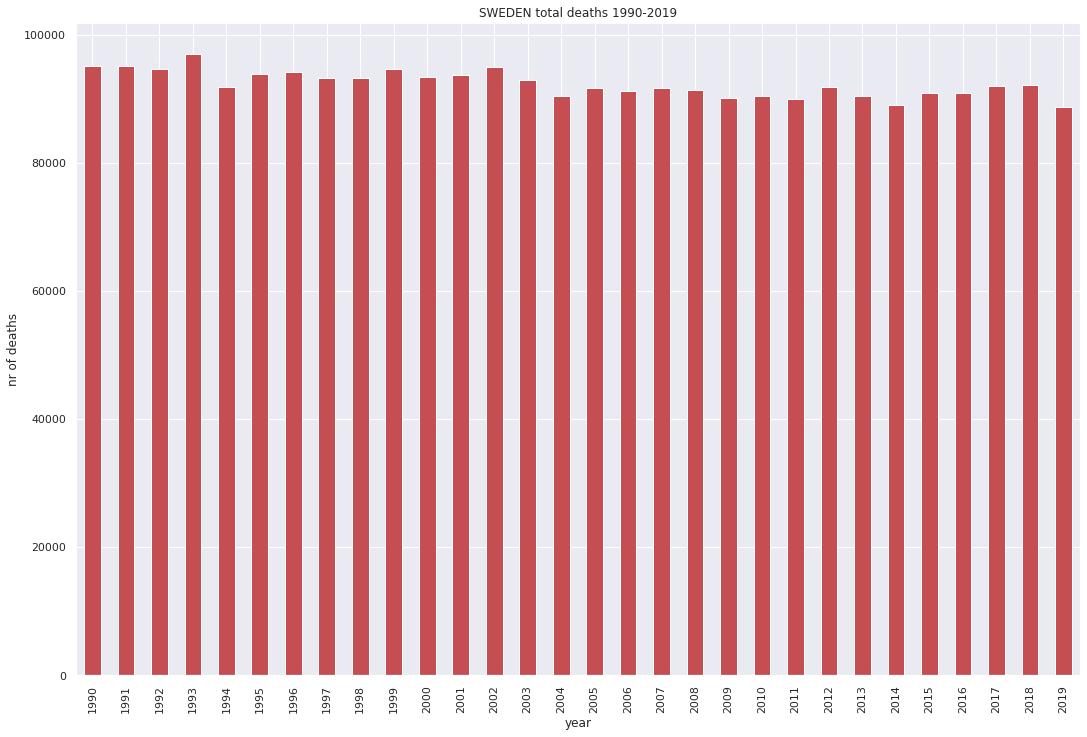

In [19]:
(death_df.iloc[:,:].sum()).plot(kind='bar',color='r',figsize=(18,12),
                               title='SWEDEN total deaths 1990-2019')
plt.ylabel('nr of deaths')
plt.savefig('total_number_of_deaths_1990_2019.jpg',format='jpg')

In [20]:
death_df[['2015','2016','2017','2018','2019']].sum().mean() - death_df.sum()['2019']

2196.4000000000087

In [21]:
scb_pop = pd.read_csv('scb_population.csv',encoding='ISO-8859-1')

scb_pop

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,8590630,8644119,8692013,8745109,8816381,8837496,8844499,8847625,8854322,8861426,...,9415570,9482855,9555893,9644864,9747355,9851017,9995153,10120242,10230185,10327589


In [22]:
pd.set_option("display.precision", 2)
deaths_per_m = death_df / (scb_pop.loc[0,:] / 1e6)
deaths_per_m = deaths_per_m.T
deaths_per_m

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


Text(0, 0.5, 'deaths per million')

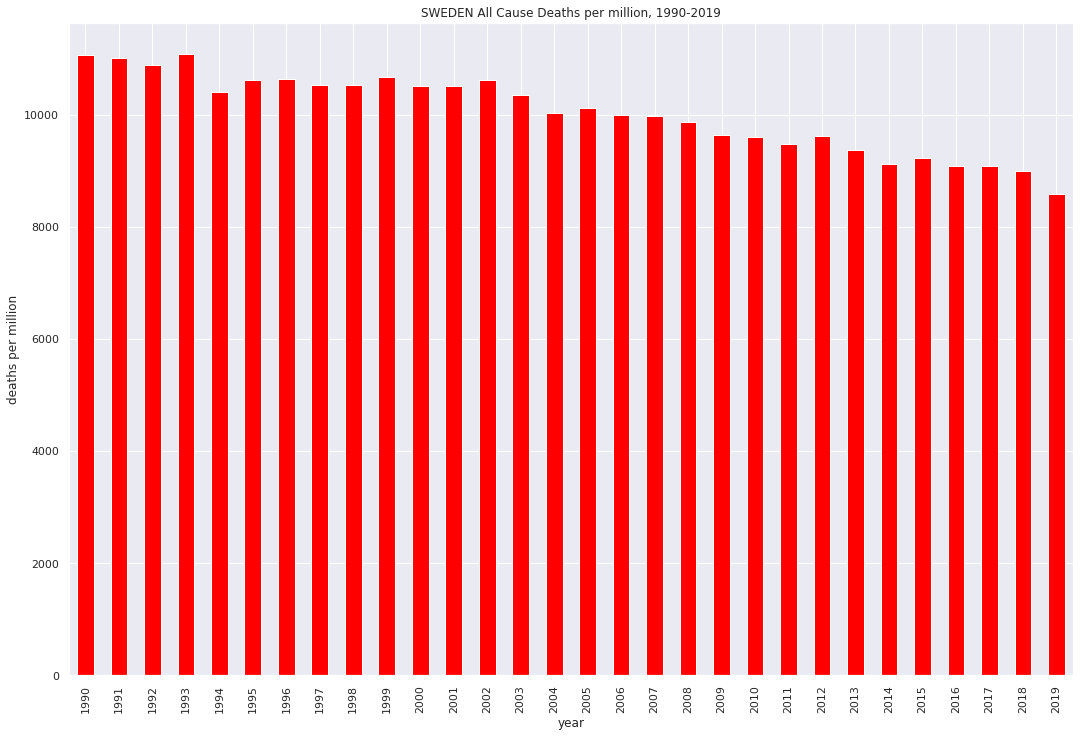

In [23]:
deaths_per_m.loc[:,'January' : 'July'].sum(axis=1)
deaths_per_m.sum(axis=1).plot(kind='bar',
                              figsize=(18,12),
                              color='red',
                              title='SWEDEN All Cause Deaths per million, 1990-2019')

plt.ylabel('deaths per million')

In [24]:
monthly_deaths = []

for r,v in deaths_per_m.iterrows():
    monthly_deaths.extend(v)
    


In [25]:
dates = pd.date_range('1990-01-01','2019-12-31',freq='M')
dates

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=360, freq='M')

In [26]:
monthly_timeline = pd.DataFrame(data=monthly_deaths,index=dates,columns=['dead_per_million'])
scb_1990_2019 = monthly_timeline.copy()

In [27]:
scb_1990_2019.loc['2019-01-01' : '2019-07-31'].sum()

dead_per_million    5025.49
dtype: float64

In [28]:
scb_pop.mean()['2015':'2019'].mean()

10104837.2

In [29]:
scb_2020 = parse_scb_prel()
scb_2020

,2015,2016,2017,2018,2019,2020,2015-2019,Månad
2020-01-01,3e+02,2.5e+02,3.5e+02,2.8e+02,3.1e+02,2.6e+02,3e+02,januari
2020-01-02,2.7e+02,2.8e+02,3.2e+02,3.2e+02,2.8e+02,3.1e+02,3e+02,januari
2020-01-03,2.8e+02,3e+02,3.2e+02,3e+02,2.8e+02,2.6e+02,3e+02,januari
2020-01-04,2.6e+02,2.7e+02,3.1e+02,2.9e+02,2.9e+02,2.8e+02,2.8e+02,januari
2020-01-05,2.7e+02,2.7e+02,3.1e+02,3e+02,2.8e+02,2.7e+02,2.9e+02,januari
...,...,...,...,...,...,...,...,...
2020-08-24,2.2e+02,2.3e+02,2.3e+02,2.2e+02,2.3e+02,1.7e+02,2.3e+02,augusti
2020-08-25,2.2e+02,2.4e+02,2.3e+02,2.2e+02,2.3e+02,1.6e+02,2.3e+02,augusti
2020-08-26,2.2e+02,2.4e+02,2.1e+02,2.2e+02,2.3e+02,96,2.2e+02,augusti
2020-08-27,2.2e+02,2.4e+02,2.1e+02,1.9e+02,2.5e+02,36,2.2e+02,augusti


In [30]:
(scb_2020.loc[:,'2015' : '2020'].sum()).astype(int)

2015    60856
2016    59826
2017    61018
2018    61859
2019    58218
2020    64008
dtype: int64

In [31]:
last_date = scb_2020.index[-1].date()
last_date

datetime.date(2020, 8, 28)

In [32]:
##### needs update when month changes #####

scb_2020 = scb_2020.groupby('Månad').sum()
scb_2020['min_2015_2019'] = scb_2020[['2015','2016','2017','2018','2019']].min(axis=1)
scb_2020['max_2015_2019'] = scb_2020[['2015','2016','2017','2018','2019']].max(axis=1)

scb_2020 = scb_2020[['2020','2015-2019','min_2015_2019','max_2015_2019']]
scb_2020_orig = scb_2020.copy()

####
# dividing all years 2015-2020 by 2020 population for consistency with scb_poisson
####

'''
scb_2020[['2015-2019','min_2015_2019',
          'max_2015_2019']] = scb_2020[['2015-2019','min_2015_2019',
            'max_2015_2019']] / (scb_pop.mean()['2015':'2019'].mean()/1e6)
'''

scb_2020[['2015-2019','min_2015_2019',
          'max_2015_2019']] = scb_2020[['2015-2019','min_2015_2019',
            'max_2015_2019']] / (curr_pop/1e6)

scb_2020 = pd.DataFrame(scb_2020)
scb_2020.reset_index(inplace=True)

# fix monthly
scb_2020['Månad'] = pd.Categorical(scb_2020['Månad'],['januari','februari','mars','april','maj','juni',
                                                      'juli','augusti'])
scb_2020.sort_values('Månad',inplace=True)

# fix monthly
scb_2020.index = pd.date_range('2020-01-01','2020-08-31',freq='M')

#scb_2020 = scb_2020.loc[:last_complete_month]
scb_2020['2020'] = scb_2020['2020'] / (curr_pop/1e6)
scb_2020.rename(columns={'2020' : 'dead_per_million'},inplace=True)
scb_2020

,Månad,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,januari,806.98,852.86,815.60,902.96
2020-02-29,februari,731.95,793.03,727.80,810.94
2020-03-31,mars,831.33,821.66,755.34,916.30
2020-04-30,april,1030.59,742.22,717.02,757.61
2020-05-31,maj,864.62,700.73,674.34,727.45
2020-06-30,juni,718.14,652.10,643.78,662.11
2020-07-31,juli,678.18,690.62,670.82,722.19
2020-08-31,augusti,535.97,609.61,596.17,621.71


In [33]:
scb_2020['dead_per_million'].cumsum() - scb_2020['2015-2019'].cumsum()

2020-01-31    -45.87
2020-02-29   -106.96
2020-03-31    -97.28
2020-04-30    191.09
2020-05-31    354.99
2020-06-30    421.02
2020-07-31    408.58
2020-08-31    334.95
Freq: M, dtype: float64

In [34]:
monthly_timeline

,dead_per_million
1990-01-31,1019.60
1990-02-28,881.73
1990-03-31,982.28
1990-04-30,930.37
1990-05-31,924.54
...,...
2019-08-31,682.81
2019-09-30,665.72
2019-10-31,731.86
2019-11-30,722.34


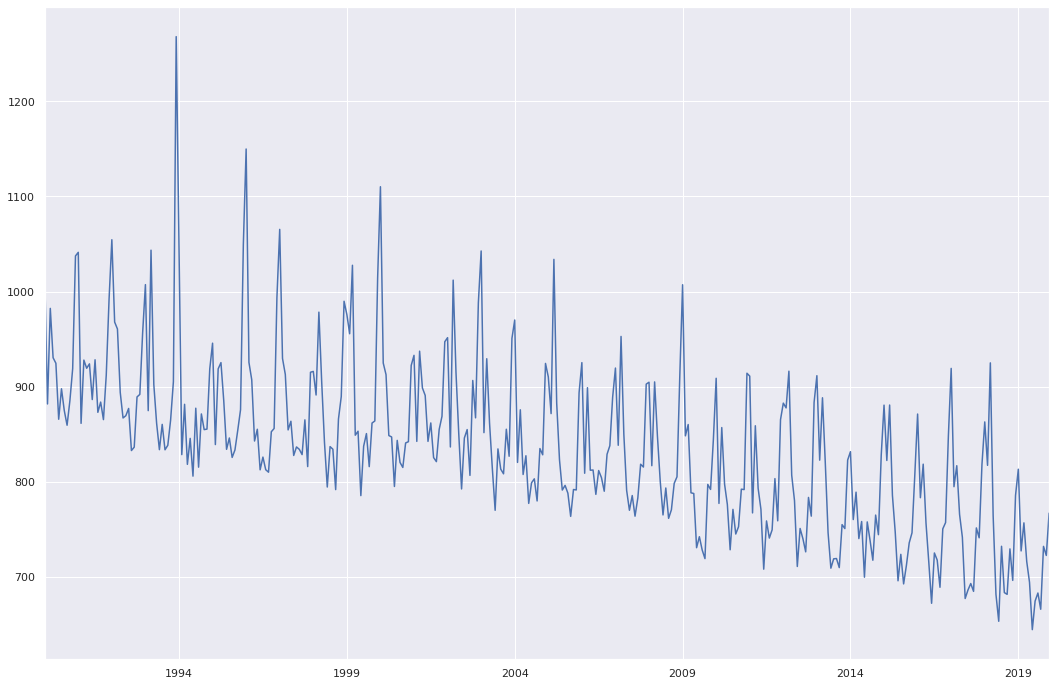

In [35]:
monthly_timeline.loc[:'2019-12-31','dead_per_million'].plot(figsize=(18,12))
plt.plot(scb_2020.loc[:last_complete_month,'dead_per_million'],color='r')

In [36]:
scb_2020

,Månad,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,januari,806.98,852.86,815.60,902.96
2020-02-29,februari,731.95,793.03,727.80,810.94
2020-03-31,mars,831.33,821.66,755.34,916.30
2020-04-30,april,1030.59,742.22,717.02,757.61
2020-05-31,maj,864.62,700.73,674.34,727.45
2020-06-30,juni,718.14,652.10,643.78,662.11
2020-07-31,juli,678.18,690.62,670.82,722.19
2020-08-31,augusti,535.97,609.61,596.17,621.71


In [37]:
monthly_timeline = pd.concat([monthly_timeline['dead_per_million'],scb_2020['dead_per_million']],axis=0)
monthly_timeline

1990-01-31    1019.60
1990-02-28     881.73
1990-03-31     982.28
1990-04-30     930.37
1990-05-31     924.54
               ...   
2020-04-30    1030.59
2020-05-31     864.62
2020-06-30     718.14
2020-07-31     678.18
2020-08-31     535.97
Freq: M, Name: dead_per_million, Length: 368, dtype: float64

In [38]:
yearly_monthly_sums = monthly_timeline.groupby(
    [monthly_timeline.index.year,monthly_timeline.index.month]).sum()

deaths_per_m_grouped_sums_1990_2020_YTD = yearly_monthly_sums.unstack().reset_index().set_index('index')
cols = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
deaths_per_m_grouped_sums_1990_2020_YTD.columns = cols
deaths_per_m_grouped_sums_1990_2020_YTD.index.name='year'
deaths_per_m_grouped_sums_1990_2020_YTD 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


In [39]:
deaths_per_m_grouped_sums_1990_2020_YTD.loc[:,'Jan':'Jul'].sum(axis=1)

year
1990    6501.86
1991    6488.17
1992    6490.23
1993    6383.02
1994    6102.30
1995    6193.44
1996    6318.70
1997    6289.80
1998    6163.05
1999    6283.55
2000    6281.43
2001    6205.89
2002    6203.49
2003    6103.12
2004    5876.38
2005    6108.49
2006    5855.32
2007    5906.35
2008    5833.53
2009    5763.68
2010    5615.20
2011    5567.26
2012    5724.54
2013    5616.36
2014    5335.69
2015    5535.02
2016    5341.10
2017    5400.57
2018    5435.64
2019    5025.49
2020    5661.80
dtype: float64

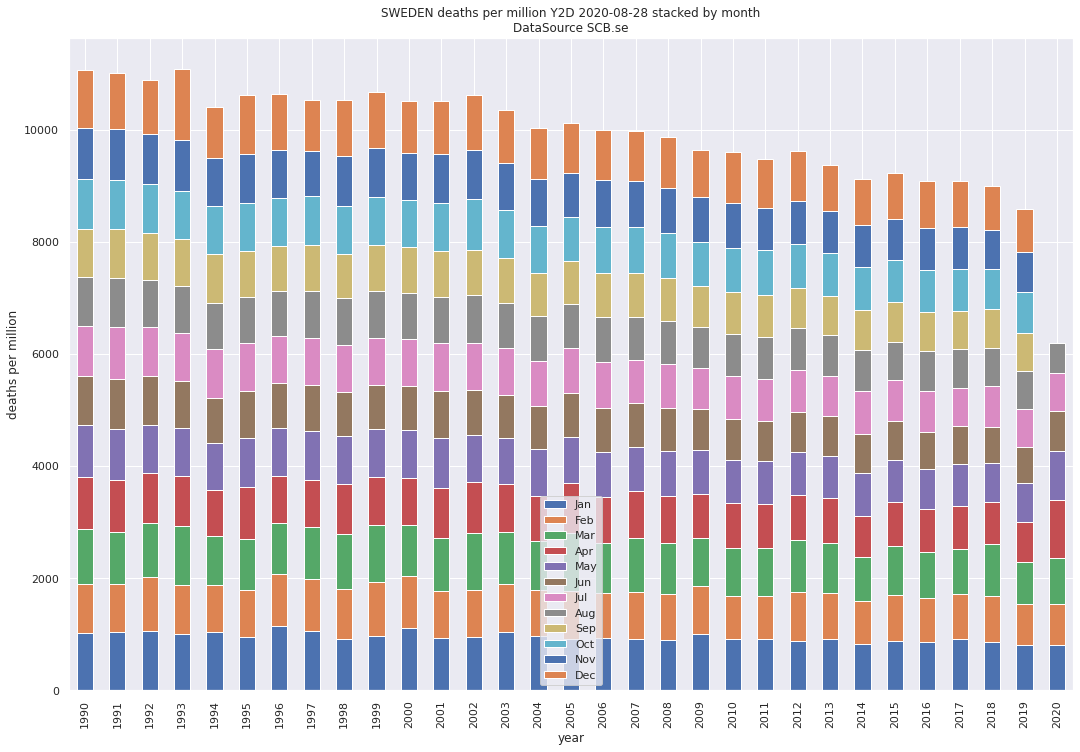

In [40]:
title = 'SWEDEN deaths per million Y2D {} stacked by month\nDataSource SCB.se'.format(last_date)

deaths_per_m_grouped_sums_1990_2020_YTD.plot(kind='bar',title=title,
                                             stacked=True,figsize=(18,12))
plt.ylabel('deaths per million')
plt.legend(loc='lower center')
plt.savefig('scb_1990_2020_deaths_per_M_stacked.jpg',format='jpg')

Text(0, 0.5, 'rank')

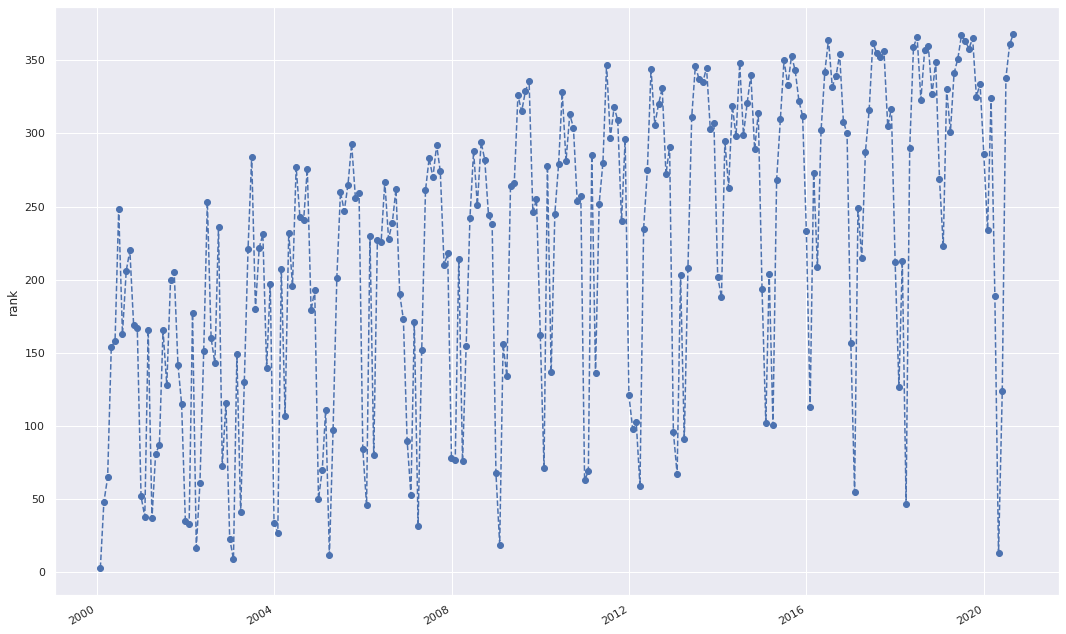

In [41]:
two_thousands_rank = monthly_timeline.rank(ascending=False).sort_values()
two_thousands_rank = two_thousands_rank.loc['2000-01-01':]
two_thousands_rank.plot(figsize=(18,12),style=['o--'])
plt.ylabel('rank')

In [42]:
monthly_timeline = pd.DataFrame(monthly_timeline.sort_values(ascending=False))
monthly_timeline['rank'] = range(1,len(monthly_timeline) + 1)
monthly_timeline.head(50)

,dead_per_million,rank
1993-12-31,1268.21,1
1996-01-31,1149.97,2
2000-01-31,1110.28,3
1997-01-31,1065.41,4
1992-01-31,1054.52,5
1995-12-31,1049.51,6
1994-01-31,1045.83,7
1993-03-31,1043.52,8
2003-01-31,1042.68,9
1991-01-31,1041.25,10


In [43]:
monthly_timeline.loc['2020-07-31']

,dead_per_million,rank
2020-07-31,678.18,361


<AxesSubplot:>

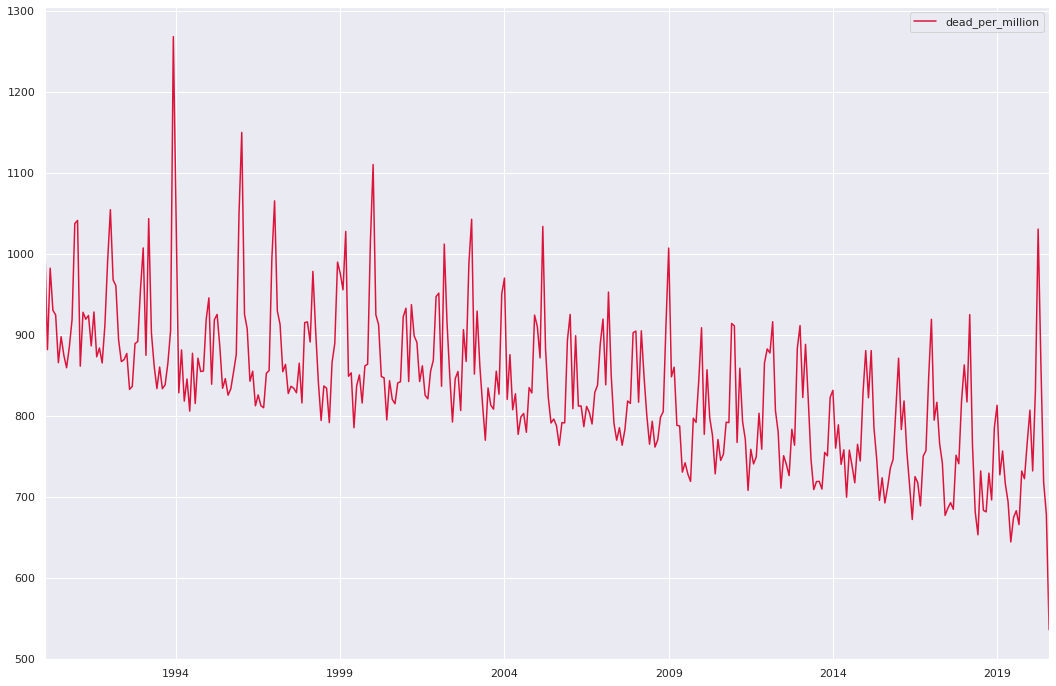

In [44]:
monthly_timeline.sort_index().plot(y='dead_per_million',figsize=(18,12),color=['crimson'])

In [45]:
mean = monthly_timeline.mean()
mean

dead_per_million    836.17
rank                184.50
dtype: float64

In [46]:
monthly_timeline.loc[last_complete_month]

,dead_per_million,rank
2020-07-31,678.18,361


In [47]:
top_20 = pd.DataFrame(monthly_timeline[:20])
top_20

,dead_per_million,rank
1993-12-31,1268.21,1
1996-01-31,1149.97,2
2000-01-31,1110.28,3
1997-01-31,1065.41,4
1992-01-31,1054.52,5
1995-12-31,1049.51,6
1994-01-31,1045.83,7
1993-03-31,1043.52,8
2003-01-31,1042.68,9
1991-01-31,1041.25,10


['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b']


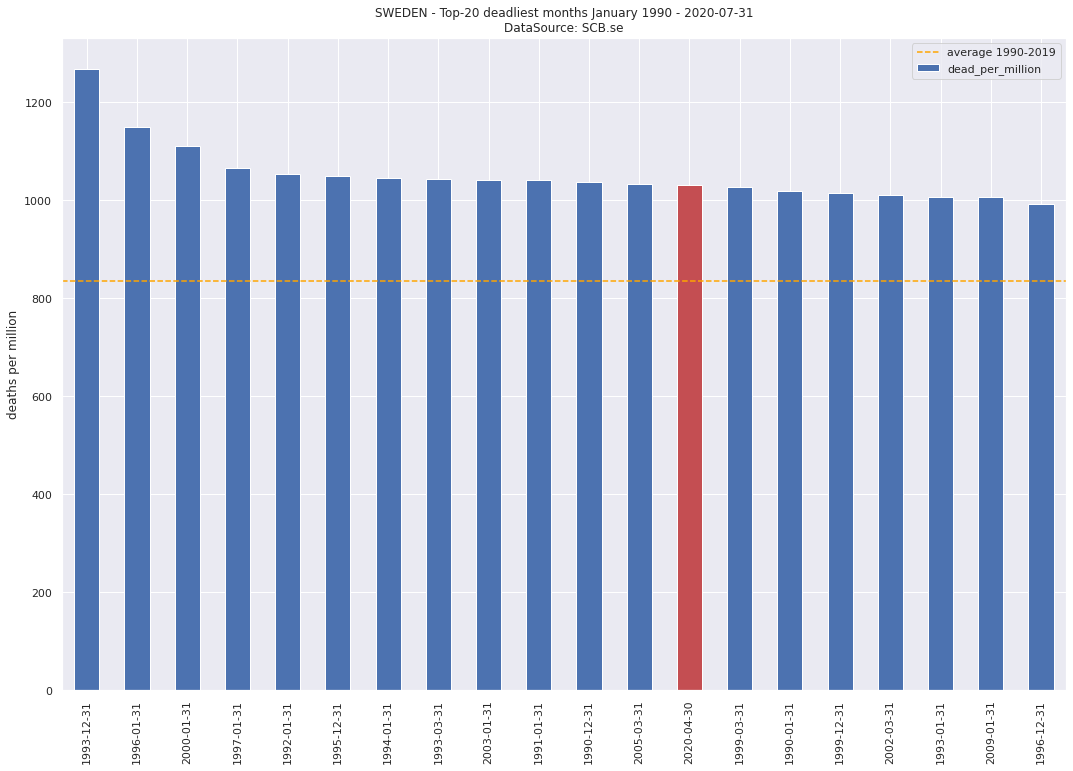

In [48]:
colors = ['b'] * 12 # must set colors after seeing which place they fall onto
colors.append('r')
colors.append('b')
print (colors)
top_20.index = top_20.index.date
top_20['dead_per_million'].plot(kind='bar',
                                figsize=(18,12),
                                color=colors,
                                title='SWEDEN - Top-20 deadliest months January 1990 - {}\nDataSource: SCB.se'.format(
                                last_complete_month))
plt.ylabel('deaths per million')
plt.axhline(mean['dead_per_million'],color='orange',ls='dashed',label='average 1990-2019')
plt.legend(loc='upper right')
plt.savefig('scb_population_deaths_1990-2020.jpg',format='jpg')

In [49]:

scb_1990_2019

,dead_per_million
1990-01-31,1019.60
1990-02-28,881.73
1990-03-31,982.28
1990-04-30,930.37
1990-05-31,924.54
...,...
2019-08-31,682.81
2019-09-30,665.72
2019-10-31,731.86
2019-11-30,722.34


In [50]:
scb_1990_2020 = pd.DataFrame(pd.concat([scb_1990_2019['dead_per_million'],scb_2020['dead_per_million']],axis=0))
scb_1990_2020

,dead_per_million
1990-01-31,1019.60
1990-02-28,881.73
1990-03-31,982.28
1990-04-30,930.37
1990-05-31,924.54
...,...
2020-04-30,1030.59
2020-05-31,864.62
2020-06-30,718.14
2020-07-31,678.18


In [51]:
scb_1990_2020['year'] = scb_1990_2020.index.year
scb_1990_2020['month'] = scb_1990_2020.index.month

In [52]:
scb_1990_2020.tail(20)

,dead_per_million,year,month
2019-01-31,813.04,2019,1
2019-02-28,727.10,2019,2
2019-03-31,756.62,2019,3
2019-04-30,716.03,2019,4
2019-05-31,694.08,2019,5
2019-06-30,644.26,2019,6
2019-07-31,674.36,2019,7
2019-08-31,682.81,2019,8
2019-09-30,665.72,2019,9
2019-10-31,731.86,2019,10


In [53]:
month_grp = scb_1990_2020[:'2019-12-31'].groupby('month')['dead_per_million'].agg(['min','mean','max'])
print (month_grp.head(12))
scb_2020


          min    mean      max
month                         
1      813.04  956.24  1149.97
2      727.10  845.41   967.89
3      756.62  912.12  1043.52
4      716.03  836.59   930.37
5      681.49  812.46   924.54
6      644.26  767.70   886.35
7      674.36  801.09   928.21
8      682.81  783.30   874.73
9      665.72  777.03   883.69
10     729.22  819.34   906.43
11     696.09  817.64   918.94
12     766.82  921.52  1268.21


,Månad,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,januari,806.98,852.86,815.60,902.96
2020-02-29,februari,731.95,793.03,727.80,810.94
2020-03-31,mars,831.33,821.66,755.34,916.30
2020-04-30,april,1030.59,742.22,717.02,757.61
2020-05-31,maj,864.62,700.73,674.34,727.45
2020-06-30,juni,718.14,652.10,643.78,662.11
2020-07-31,juli,678.18,690.62,670.82,722.19
2020-08-31,augusti,535.97,609.61,596.17,621.71


In [54]:
scb_2020['excess'] = scb_2020['dead_per_million'] - scb_2020['2015-2019']
scb_2020

,Månad,dead_per_million,2015-2019,min_2015_2019,max_2015_2019,excess
2020-01-31,januari,806.98,852.86,815.60,902.96,-45.87
2020-02-29,februari,731.95,793.03,727.80,810.94,-61.08
2020-03-31,mars,831.33,821.66,755.34,916.30,9.67
2020-04-30,april,1030.59,742.22,717.02,757.61,288.37
2020-05-31,maj,864.62,700.73,674.34,727.45,163.90
2020-06-30,juni,718.14,652.10,643.78,662.11,66.04
2020-07-31,juli,678.18,690.62,670.82,722.19,-12.44
2020-08-31,augusti,535.97,609.61,596.17,621.71,-73.64


In [55]:
excess = scb_2020.set_index(scb_2020.index.month).join(month_grp['mean'])
excess.drop(['min_2015_2019','max_2015_2019'],axis=1,inplace=True)


,Månad,dead_per_million,2015-2019,excess,1990-2019_mean,excess_1990_baseline,excess_2015_baseline,cumulative_excess_vs_1990-2019,cumulative_excess_vs_2015-2019,date
1,januari,806.98,852.86,-45.87,956.24,-149.26,-45.87,-149.26,-45.87,2020-01-31
2,februari,731.95,793.03,-61.08,845.41,-113.46,-61.08,-262.72,-106.96,2020-02-29
3,mars,831.33,821.66,9.67,912.12,-80.79,9.67,-343.52,-97.28,2020-03-31
4,april,1030.59,742.22,288.37,836.59,194.00,288.37,-149.51,191.09,2020-04-30
5,maj,864.62,700.73,163.90,812.46,52.16,163.90,-97.35,354.99,2020-05-31
6,juni,718.14,652.10,66.04,767.70,-49.57,66.04,-146.92,421.02,2020-06-30
7,juli,678.18,690.62,-12.44,801.09,-122.90,-12.44,-269.82,408.58,2020-07-31
8,augusti,535.97,609.61,-73.64,783.30,-247.33,-73.64,-517.15,334.95,2020-08-31


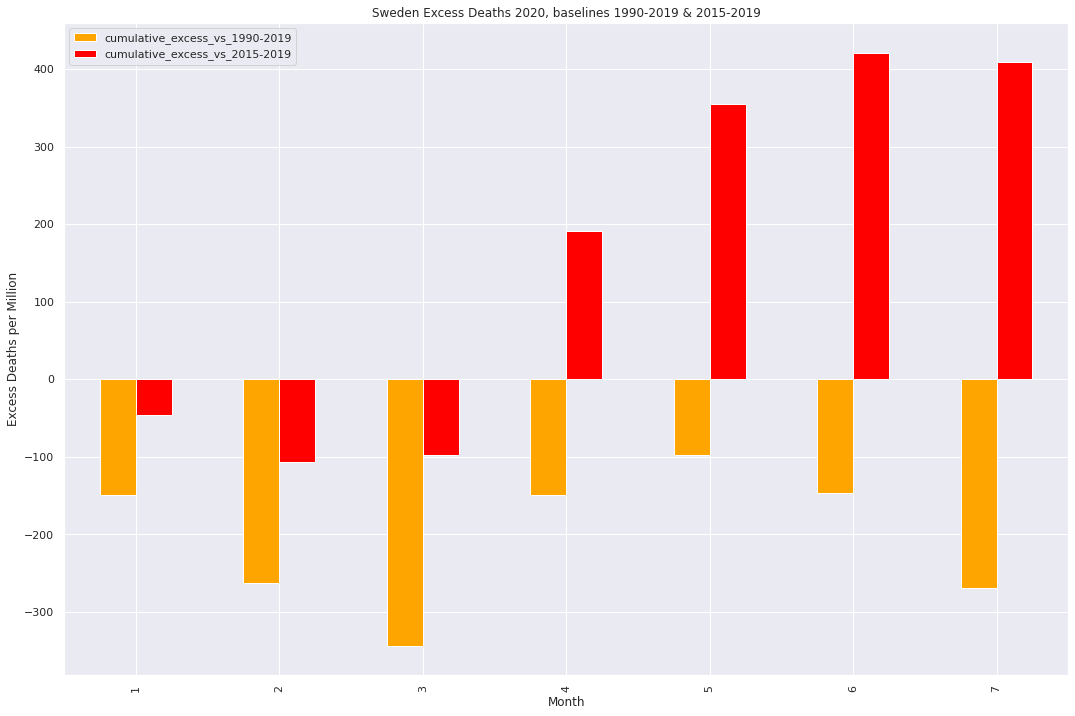

In [56]:
excess.rename(columns={'mean' : '1990-2019_mean'}, inplace=True)
excess['excess_1990_baseline'] = excess['dead_per_million'] - excess['1990-2019_mean']
excess['excess_2015_baseline'] = excess['dead_per_million'] - excess['2015-2019']
excess['cumulative_excess_vs_1990-2019'] = excess['excess_1990_baseline'].cumsum()
excess['cumulative_excess_vs_2015-2019'] = excess['excess_2015_baseline'].cumsum()

# fix monthly
excess['date'] = pd.date_range('2020-01-01','2020-08-31',freq='M')

excess[:pd.Timestamp(last_complete_month).date().month].plot(kind='bar',figsize=(18,12),
                                                             title=('Sweden Excess Deaths 2020, baselines 1990-2019 & 2015-2019'),
                                                             y=['cumulative_excess_vs_1990-2019',
                                                               'cumulative_excess_vs_2015-2019'],color=['orange','red'])
plt.ylabel('Excess Deaths per Million')
plt.xlabel('Month')
excess

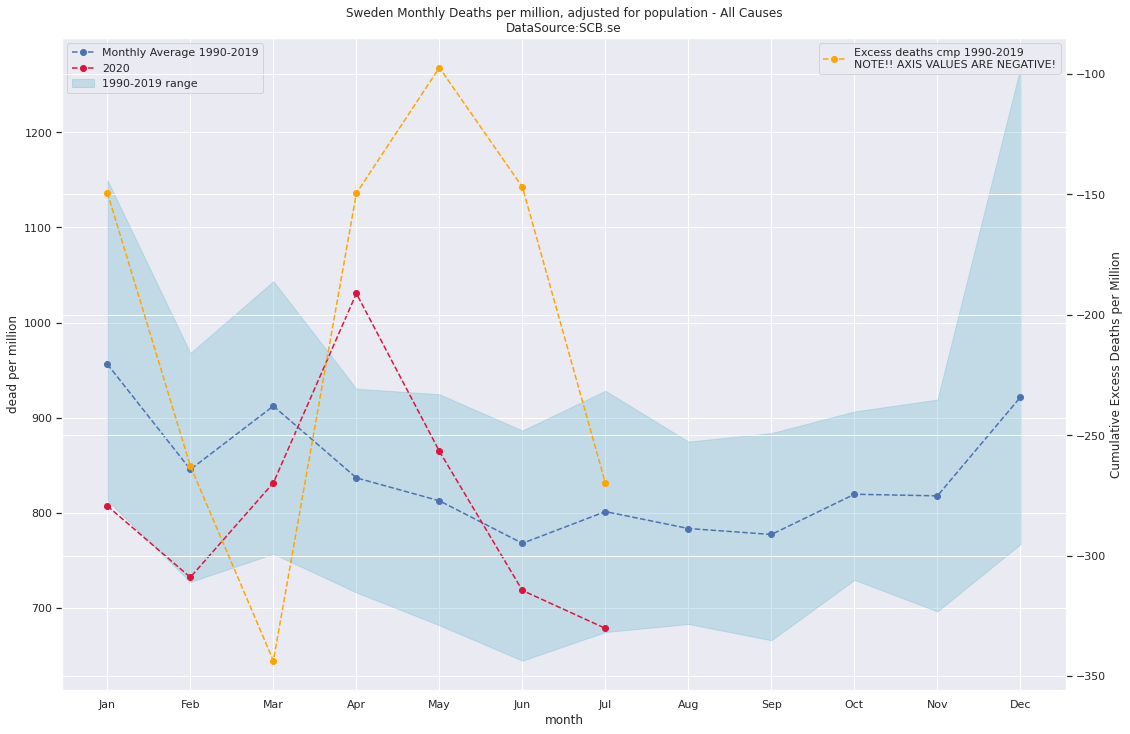

In [57]:
scb_2020['month'] = scb_2020.index.month 

plt.figure(figsize=(18,12))
plt.title('Sweden Monthly Deaths per million, adjusted for population - All Causes\nDataSource:SCB.se')
ax = plt.gca()
ax2 = plt.twinx()

ax.plot(month_grp['mean'],'o--',label='Monthly Average 1990-2019')
#ax.plot(scb_2020['month'],scb_2020['2015-2019'],'o--',color='k',label='Monthly Average 2015-2019')
#plt.fill_between(scb_2020['month'],scb_2020['min_2015_2019'],scb_2020['max_2015_2019'],color='m',alpha=0.3,label='2015-2019 range')

ax.fill_between(month_grp.index,month_grp['min'],month_grp['max'],color='c',alpha=0.3,label='1990-2019 range')

ax.plot(scb_2020['month'][:last_complete_month],scb_2020['dead_per_million'][:last_complete_month],'o--',color='crimson',label='2020')
ax.legend(loc='upper left')
ax.set_xlabel('month')
ax.set_ylabel('dead per million')

#ax2.plot(excess['cum_vs_2015'][:pd.Timestamp(last_complete_month).month],'o--',
         #color='orange',label='Excess deaths cmp 2015-2019')

ax2.plot(excess['cumulative_excess_vs_1990-2019'][:pd.Timestamp(last_complete_month).month],'o--',
         color='orange',label='Excess deaths cmp 1990-2019\nNOTE!! AXIS VALUES ARE NEGATIVE!')

ax2.set_ylabel('Cumulative Excess Deaths per Million')
#ax2.set_ylim([-400,10])
ax2.legend(loc='upper right')

xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
_=plt.xticks(month_grp.index,xticks)
plt.savefig('scb_monthly_deaths_all_cmp_1990_2019.jpg',format='jpg')

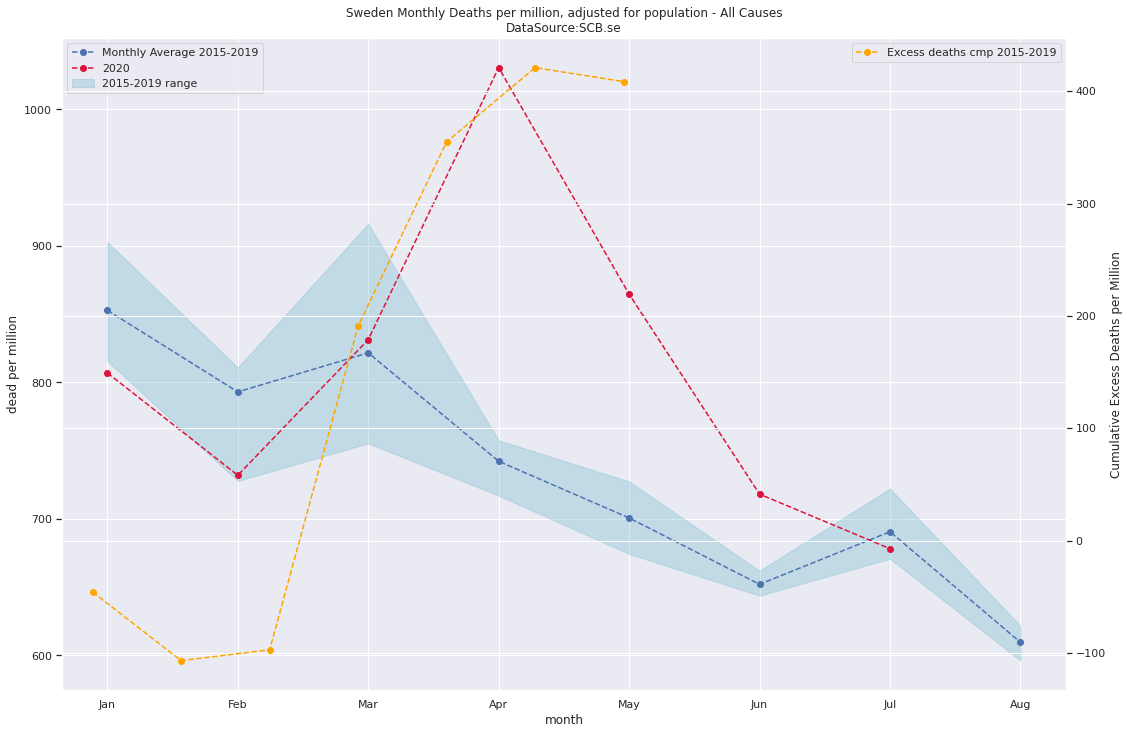

In [58]:
plt.figure(figsize=(18,12))
plt.title('Sweden Monthly Deaths per million, adjusted for population - All Causes\nDataSource:SCB.se')
ax = plt.gca()
ax2 = plt.twinx()

#ax.plot(month_grp['mean'],'o--',label='Monthly Average 1990-2019')
ax.plot(scb_2020['month'],scb_2020['2015-2019'],'o--',color='b',label='Monthly Average 2015-2019')
ax.fill_between(scb_2020['month'],scb_2020['min_2015_2019'],scb_2020['max_2015_2019'],color='c',alpha=0.3,label='2015-2019 range')

#ax.fill_between(month_grp.index,month_grp['min'],month_grp['max'],color='c',alpha=0.3,label='1990-2019 range')

ax.plot(scb_2020['month'][:last_complete_month],scb_2020['dead_per_million'][:last_complete_month],'o--',color='crimson',label='2020')
ax.legend(loc='upper left')
ax.set_xlabel('month')
ax.set_ylabel('dead per million')

#ax2.plot(excess['cum_vs_2015'][:pd.Timestamp(last_complete_month).month],'o--',
         #color='orange',label='Excess deaths cmp 2015-2019')

ax2.plot(excess['cumulative_excess_vs_2015-2019'][:pd.Timestamp(last_complete_month).month],'o--',
         color='orange',label='Excess deaths cmp 2015-2019')

ax2.set_ylabel('Cumulative Excess Deaths per Million')
ax2.legend(loc='upper right')

xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
_=plt.xticks(month_grp.index,xticks)
plt.savefig('scb_monthly_deaths_all_cmp_2015-2019.jpg',format='jpg')

In [59]:
scb_2020_monthly = scb_2020.set_index('month')
print (scb_2020_monthly)

mean_1990_2019 = month_grp.loc[:pd.Timestamp(last_complete_month).month]
print (mean_1990_2019)
monthly_excess = scb_2020_monthly['dead_per_million'] - mean_1990_2019['mean']
print (monthly_excess)
print (monthly_excess.cumsum())

          Månad  dead_per_million  2015-2019  min_2015_2019  max_2015_2019  \
month                                                                        
1       januari            806.98     852.86         815.60         902.96   
2      februari            731.95     793.03         727.80         810.94   
3          mars            831.33     821.66         755.34         916.30   
4         april           1030.59     742.22         717.02         757.61   
5           maj            864.62     700.73         674.34         727.45   
6          juni            718.14     652.10         643.78         662.11   
7          juli            678.18     690.62         670.82         722.19   
8       augusti            535.97     609.61         596.17         621.71   

       excess  
month          
1      -45.87  
2      -61.08  
3        9.67  
4      288.37  
5      163.90  
6       66.04  
7      -12.44  
8      -73.64  
          min    mean      max
month                       

In [60]:
pd.Timestamp(last_complete_month).month

7

In [61]:
mask = scb_1990_2020.index.month.isin(range(1,pd.Timestamp(last_complete_month).month + 1))
first_months = scb_1990_2020[mask]['dead_per_million']
first_cum = first_months.groupby(first_months.index.year).sum()
first_cum

1990    6501.86
1991    6488.17
1992    6490.23
1993    6383.02
1994    6102.30
1995    6193.44
1996    6318.70
1997    6289.80
1998    6163.05
1999    6283.55
2000    6281.43
2001    6205.89
2002    6203.49
2003    6103.12
2004    5876.38
2005    6108.49
2006    5855.32
2007    5906.35
2008    5833.53
2009    5763.68
2010    5615.20
2011    5567.26
2012    5724.54
2013    5616.36
2014    5335.69
2015    5535.02
2016    5341.10
2017    5400.57
2018    5435.64
2019    5025.49
2020    5661.80
Name: dead_per_million, dtype: float64

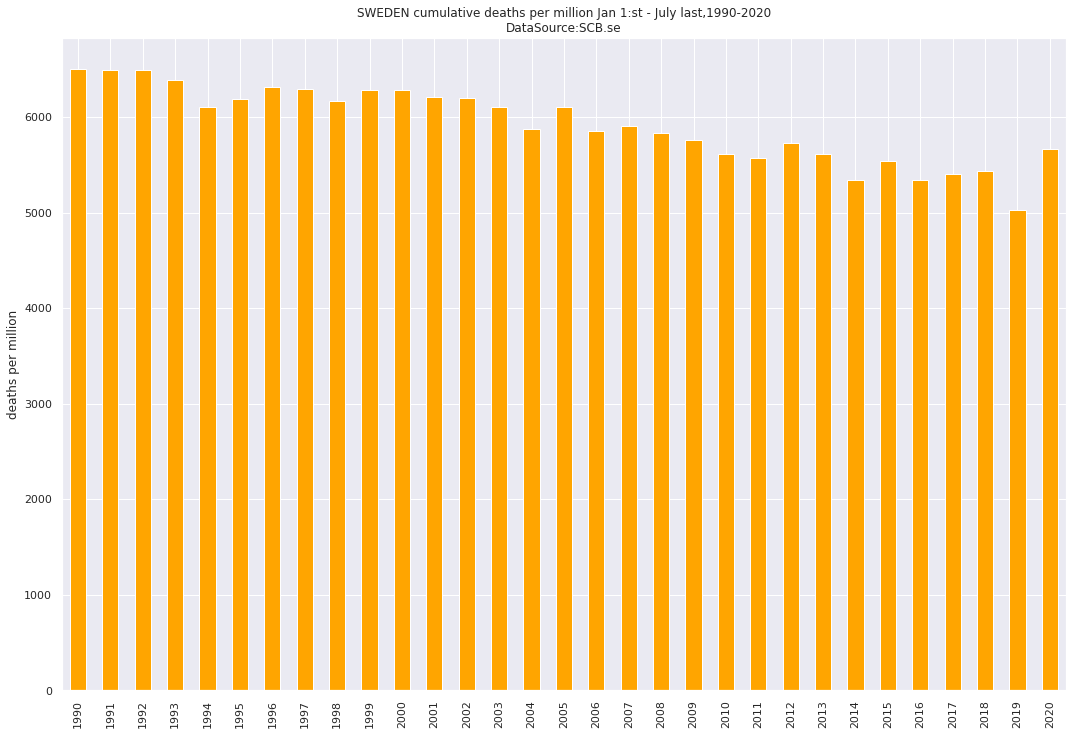

In [62]:
first_cum.plot(kind='bar',figsize=(18,12),color='orange',
               title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()))
plt.ylabel('deaths per million')
plt.savefig('scb_deaths_jan_may_unsorted.jpg'.format('jpg'))

['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'crimson', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


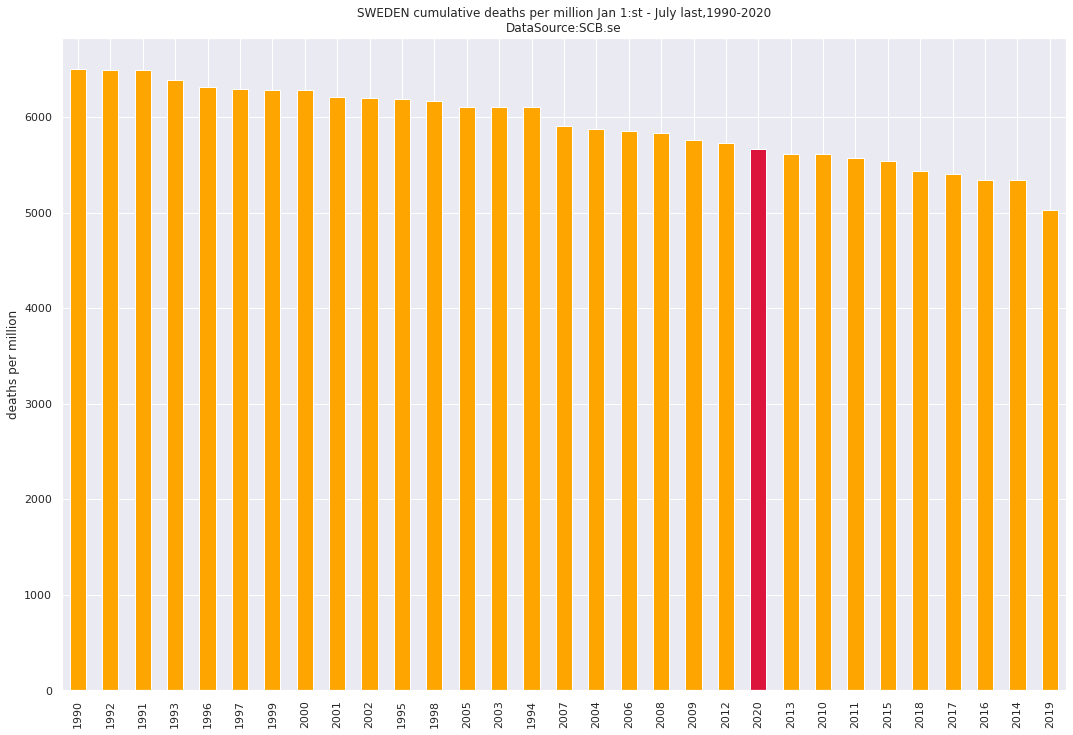

In [63]:
colors = ['orange'] * 21
colors.append('crimson')
color_tail = ['orange'] * 9
colors.extend(color_tail)

print (colors)
first_cum.sort_values(ascending=False).plot(kind='bar',figsize=(18,12),
                                            title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()),
                                            color=colors)
plt.ylabel('deaths per million')
plt.savefig('scb_deaths_jan_july_sorted.jpg',format='jpg')

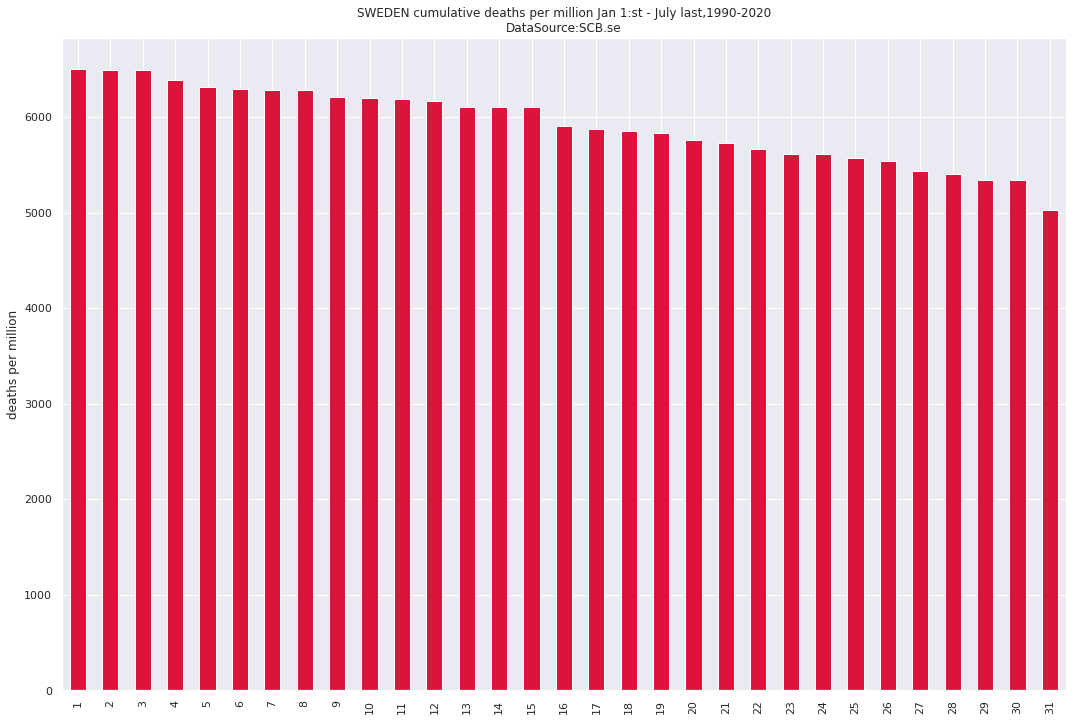

In [64]:
first_cum.sort_values(ascending=False).plot(kind='bar',figsize=(18,12),
                                            title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()),
                                            color='crimson')
plt.ylabel('deaths per million')
plt.xticks(range(len(first_cum)),range(1,len(first_cum) + 1))
plt.savefig('scb_deaths_jan_july_sorted_random.jpg',format='jpg')

In [65]:
by_month = first_months.groupby(first_months.index.month)
month_stats =[]

for month in range (1,pd.Timestamp(last_complete_month).month + 1):
    m = by_month.get_group(month)
    month_stats.append(m.agg(['min','mean','max']).values)
    
month_stats = pd.DataFrame(data=np.array(month_stats),
                           index=range(1,pd.Timestamp(last_complete_month).month + 1),
                           columns=['mini','mean','maxi'])

month_stats.index.name='month'
month_stats

,mini,mean,maxi
month,,,
1,806.98,951.43,1149.97
2,727.10,841.75,967.89
3,756.62,909.52,1043.52
4,716.03,842.85,1030.59
5,681.49,814.14,924.54
6,644.26,766.11,886.35
7,674.36,797.12,928.21


Text(0, 0.5, 'cumulative deaths per million')

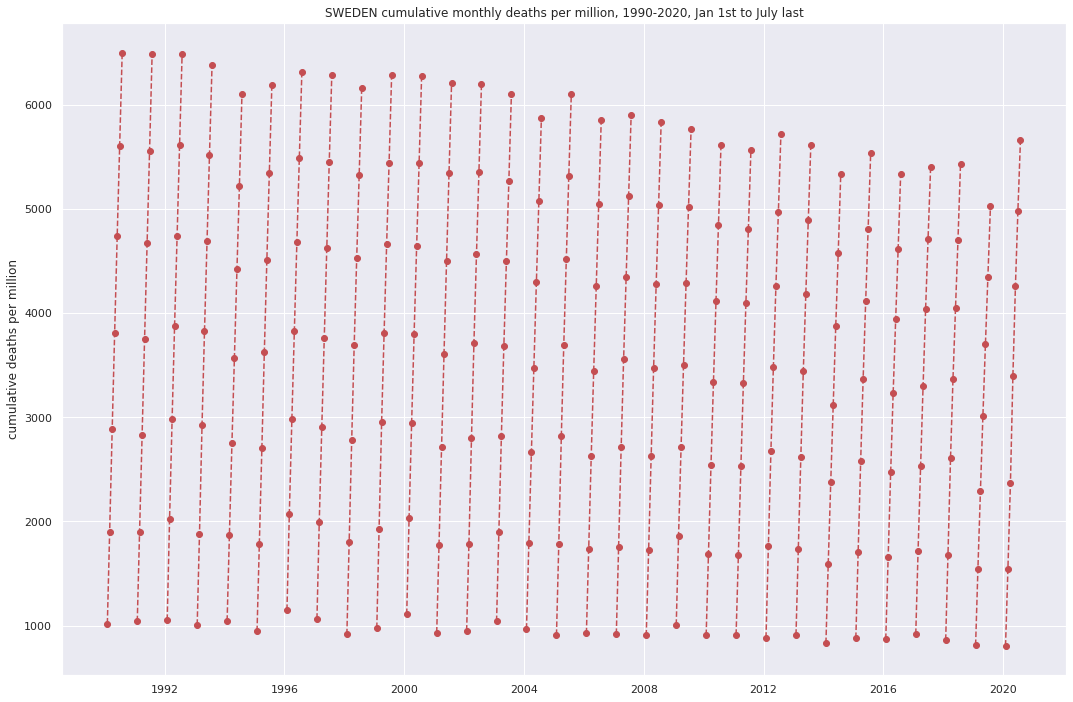

In [66]:
from matplotlib import cm

first_cumsum = first_months.groupby(first_months.index.year).cumsum()
bar = first_cumsum.groupby(first_cumsum.index.year)

plt.figure(figsize=(18,12))
plt.title('SWEDEN cumulative monthly deaths per million, 1990-2020, Jan 1st to {} last'.format(
    pd.Timestamp(last_complete_month).month_name()))

for k in bar.groups.keys():
    plt.plot(bar.get_group(k),'ro--')
    
plt.ylabel('cumulative deaths per million')

In [67]:
first_months

1990-01-31    1019.60
1990-02-28     881.73
1990-03-31     982.28
1990-04-30     930.37
1990-05-31     924.54
               ...   
2020-03-31     831.33
2020-04-30    1030.59
2020-05-31     864.62
2020-06-30     718.14
2020-07-31     678.18
Name: dead_per_million, Length: 217, dtype: float64

In [68]:
first_sum = first_months.groupby(first_months.index.year)

month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
              7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

years = dict()

for k in first_sum.groups.keys():
    years[k] = first_sum.get_group(k).values
    
years = pd.DataFrame(years).T
num_months = range(1,pd.Timestamp(last_complete_month).month + 1)
years.columns= num_months

years.rename(columns=month_names,inplace=True)

years.columns.name = 'month'
years.index.name = 'year'
years_per_M = years



In [69]:
years_1990_2019_mean = years.loc[1990:2019].mean().sum()
years_2015_2019_mean = years.loc[2015:2019].mean().sum()
print (years_1990_2019_mean)
print (years_2015_2019_mean)
years

5931.621952837172
5347.5643261691785


month,Jan,Feb,Mar,Apr,May,Jun,Jul
year,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83


In [70]:
years.to_csv('death_per_M_1990_2020_Jan_Jul.csv')

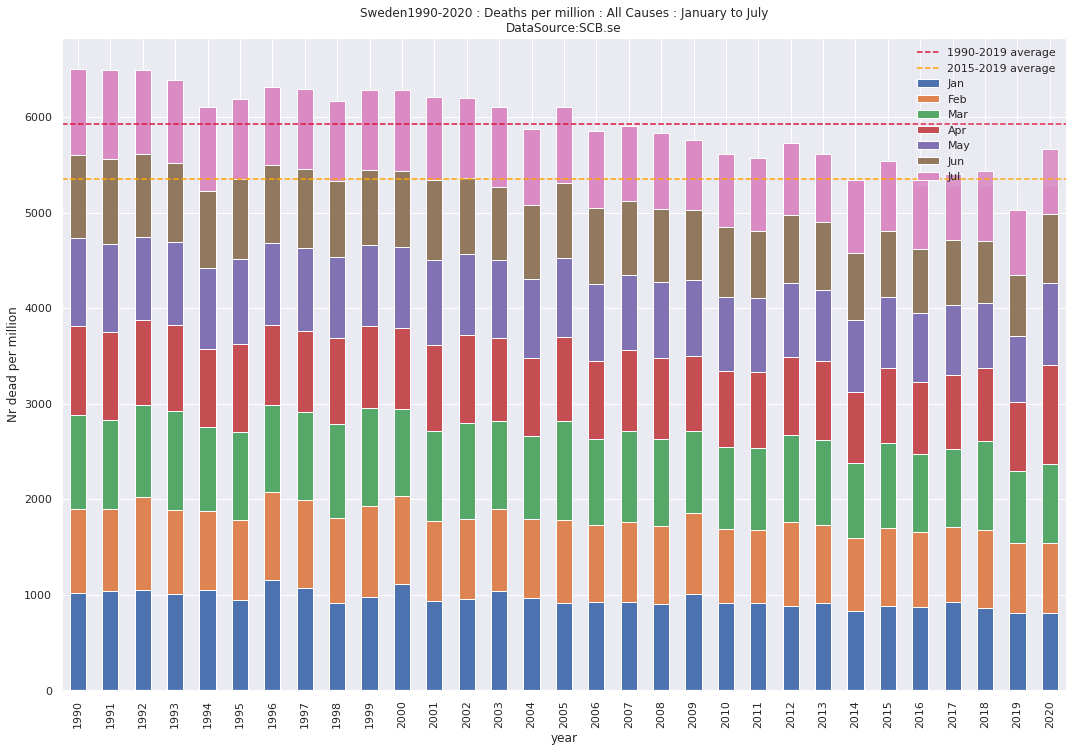

In [71]:


years.plot(kind='bar',stacked=True,figsize=(18,12),
          title='Sweden1990-2020 : Deaths per million : All Causes : January to {}\nDataSource:SCB.se'.format(
              pd.Timestamp(last_complete_month).month_name()))

plt.axhline(years_1990_2019_mean,ls='dashed',color='crimson',label='1990-2019 average')
plt.axhline(years_2015_2019_mean,ls='dashed',color='orange',label='2015-2019 average')

plt.ylabel('Nr dead per million')

plt.legend(framealpha=0.1, loc='best')
plt.savefig('scb_deaths_per_M_per_month_1990_2020.jpg',format='jpg')

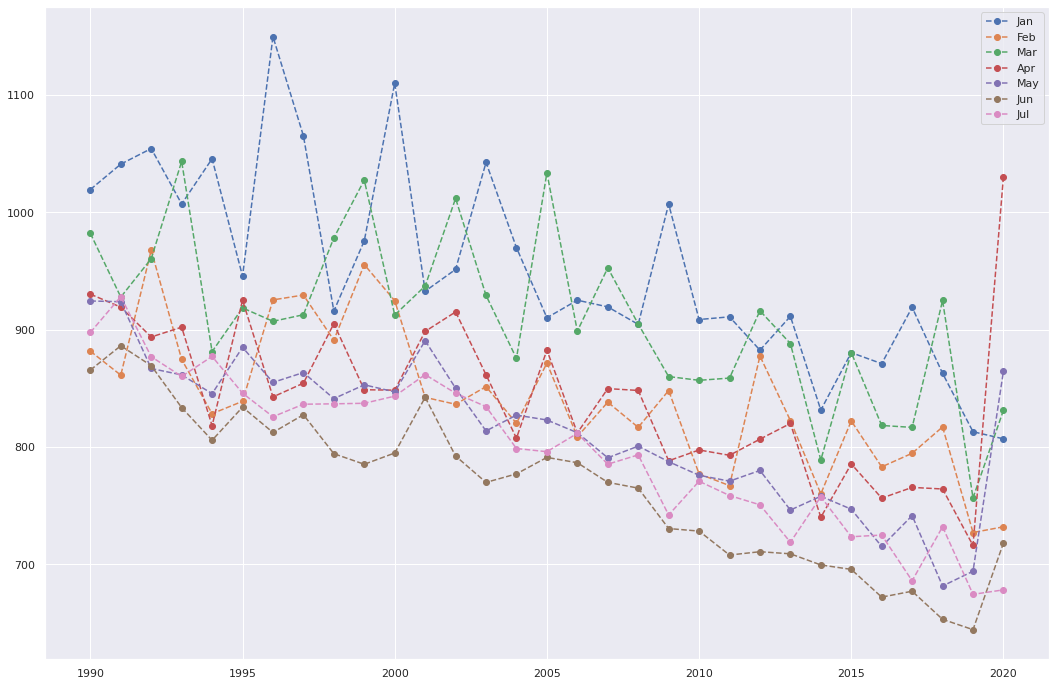

In [72]:
plt.figure(figsize=(18,12))
for month in years.columns:
    
    plt.plot(years.index,years[month],'o--',label=month)
    
plt.legend(loc='upper right')


month    Jan   Feb    Mar    Apr   May   Jun   Jul
year                                              
1990   10.20  8.82   9.82   9.30  9.25  8.66  8.98
1991   10.41  8.61   9.28   9.19  9.24  8.86  9.28
1992   10.55  9.68   9.61   8.94  8.67  8.69  8.77
1993   10.07  8.75  10.44   9.02  8.61  8.34  8.60
1994   10.46  8.28   8.81   8.18  8.45  8.06  8.77
1995    9.46  8.39   9.19   9.25  8.85  8.34  8.46
1996   11.50  9.25   9.07   8.43  8.55  8.12  8.26
1997   10.65  9.30   9.13   8.54  8.64  8.28  8.36
1998    9.16  8.91   9.78   9.05  8.41  7.94  8.37
1999    9.76  9.56  10.28   8.49  8.53  7.85  8.37
2000   11.10  9.25   9.13   8.48  8.47  7.95  8.43
2001    9.33  8.42   9.37   8.99  8.91  8.42  8.62
2002    9.51  8.36  10.12   9.15  8.50  7.92  8.46
2003   10.43  8.52   9.29   8.62  8.14  7.70  8.34
2004    9.70  8.20   8.76   8.08  8.27  7.77  7.99
2005    9.10  8.72  10.34   8.83  8.23  7.91  7.96
2006    9.25  8.09   8.99   8.12  8.12  7.87  8.12
2007    9.20  8.38   9.53   8.5

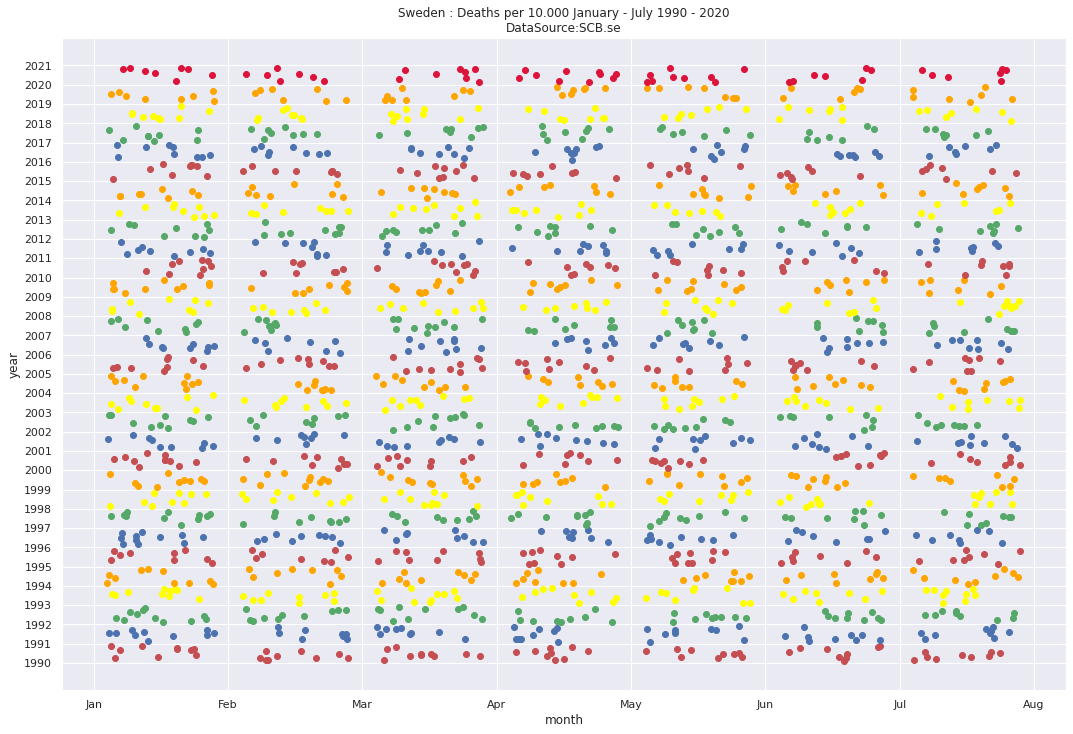

In [73]:
scatter_scale_factor = 100
#years = years[:10]
years = years / scatter_scale_factor

colors =['r','b','g','yellow','orange'] * 6
colors.append('crimson')

plt.figure(figsize=(18,12))
plt.title('Sweden : Deaths per 10.000 January - {} 1990 - 2020\nDataSource:SCB.se'.format(
    pd.Timestamp(last_complete_month).month_name()))
plt.grid(True)

for r in range(len(years.index)):
    for c in range(len(years.columns) ):
        ndots = int(np.round(years.iloc[r,c]))
        
        
        for i in range (0,ndots):
            rr = 0.1 + r + 0.8 * np.random.random()
            cc = 0.1 + c + 0.8 * np.random.random()
            
            plt.scatter(cc,rr,color = colors[r])

yticks = range(1990,2022)

random_labels = list('ABCDEFGHIJKLMNOPQRSTUVXYZ')
random_labels.extend(('AA','BB','CC','DD','EE','FF'))
#yticks = random_labels

plt.yticks(range(len(years) + 1),yticks)

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']
plt.xticks(range(len(years.columns) + 1),month_names)

plt.ylabel('year')
plt.xlabel('month')
print (years)
plt.savefig('scb_1990_2019_deaths_scatter.jpg',format='jpg')


In [74]:
print (years)
deaths_per_month = years.sum(axis=0)


deaths_per_year = years.sum(axis=1) 

print (deaths_per_month)
print (deaths_per_year)

month    Jan   Feb    Mar    Apr   May   Jun   Jul
year                                              
1990   10.20  8.82   9.82   9.30  9.25  8.66  8.98
1991   10.41  8.61   9.28   9.19  9.24  8.86  9.28
1992   10.55  9.68   9.61   8.94  8.67  8.69  8.77
1993   10.07  8.75  10.44   9.02  8.61  8.34  8.60
1994   10.46  8.28   8.81   8.18  8.45  8.06  8.77
1995    9.46  8.39   9.19   9.25  8.85  8.34  8.46
1996   11.50  9.25   9.07   8.43  8.55  8.12  8.26
1997   10.65  9.30   9.13   8.54  8.64  8.28  8.36
1998    9.16  8.91   9.78   9.05  8.41  7.94  8.37
1999    9.76  9.56  10.28   8.49  8.53  7.85  8.37
2000   11.10  9.25   9.13   8.48  8.47  7.95  8.43
2001    9.33  8.42   9.37   8.99  8.91  8.42  8.62
2002    9.51  8.36  10.12   9.15  8.50  7.92  8.46
2003   10.43  8.52   9.29   8.62  8.14  7.70  8.34
2004    9.70  8.20   8.76   8.08  8.27  7.77  7.99
2005    9.10  8.72  10.34   8.83  8.23  7.91  7.96
2006    9.25  8.09   8.99   8.12  8.12  7.87  8.12
2007    9.20  8.38   9.53   8.5

Text(0, 0.5, 'year')

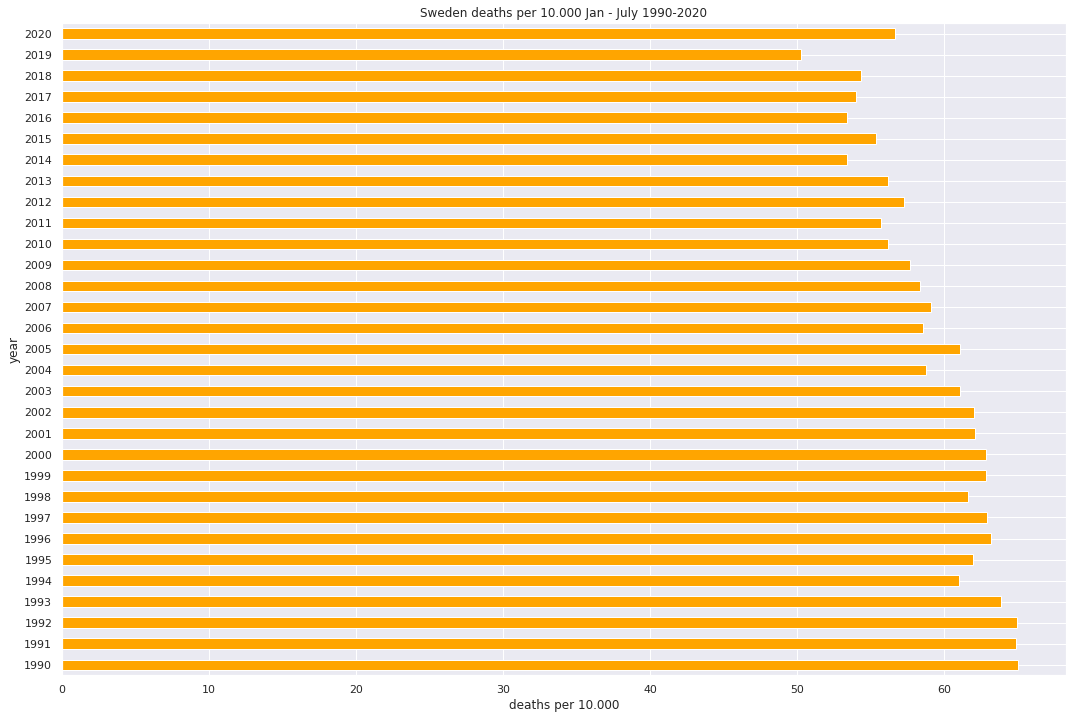

In [75]:
deaths_per_year.plot(kind='barh',title='Sweden deaths per 10.000 Jan - {} 1990-2020'.format(
    pd.Timestamp(last_complete_month).month_name()),color='orange',
                     figsize=(18,12))

plt.xlabel('deaths per 10.000')
plt.ylabel('year')

In [76]:
years = years_per_M
print (years[:-1])

average_2015_2019 = years.loc[2015:2019].mean()
print (average_2015_2019)
monthly_average = years[:-1].mean()
print (monthly_average)
monthly_percentiles = years[:-1].quantile(1,axis=0)
monthly_percentiles


month      Jan     Feb      Mar     Apr     May     Jun     Jul
year                                                           
1990   1019.60  881.73   982.28  930.37  924.54  865.63  897.71
1991   1041.25  861.31   927.86  919.28  923.92  886.35  928.21
1992   1054.52  967.89   960.63  893.84  866.96  869.39  877.00
1993   1007.27  874.68  1043.52  902.21  861.49  833.62  860.23
1994   1045.83  828.42   881.35  818.18  845.50  805.77  877.25
1995    945.67  838.99   918.63  925.22  885.00  833.99  845.92
1996   1149.97  925.47   907.20  842.73  855.10  812.42  825.82
1997   1065.41  929.61   912.80  854.44  863.52  827.53  836.50
1998    915.97  891.14   978.33  905.20  841.26  794.32  836.83
1999    975.86  955.58  1027.64  848.85  853.04  785.29  837.29
2000   1110.28  924.78   912.58  848.48  847.01  794.90  843.39
2001    932.88  842.34   937.28  898.60  890.71  842.34  861.74
2002    951.47  836.45  1012.01  915.19  850.16  792.31  845.89
2003   1042.68  851.54   929.32  861.61 

month
Jan    1149.97
Feb     967.89
Mar    1043.52
Apr     930.37
May     924.54
Jun     886.35
Jul     928.21
Name: 1, dtype: float64

In [77]:
### USES fhm_scb_dead.csv

fhm_dead = pd.read_csv('fhm_scb_dead.csv',sep=';',header=0,index_col=0,parse_dates=True,names=['fhm_dead'])
fhm_dead


,fhm_dead
2020-03-11,1
2020-03-12,0
2020-03-13,1
2020-03-14,1
2020-03-15,2
...,...
2020-08-23,0
2020-08-24,0
2020-08-25,0
2020-08-26,0


In [78]:
fhm_monthly = fhm_dead.groupby(fhm_dead.index.month).sum()
fhm_monthly['fhm_dead_per_M'] = fhm_monthly['fhm_dead'] / (curr_pop / 1e6)
fhm_monthly.at[1,:] = [0,0]
fhm_monthly.at[2,:] = [0,0]
fhm_monthly.sort_index(inplace=True)
fhm_monthly

,fhm_dead,fhm_dead_per_M
1,0.0,0.00
2,0.0,0.00
3,332.0,32.15
4,2544.0,246.33
5,1757.0,170.13
6,865.0,83.76
7,265.0,25.66
8,53.0,5.13


In [79]:
scb_dead_2020_per_M = pd.DataFrame(years.loc[2020].copy())
scb_dead_2020_per_M['month_nr'] = range(1,len(scb_dead_2020_per_M) + 1)
scb_dead_2020_per_M.reset_index(inplace=True)
scb_dead_2020_per_M.set_index('month_nr',inplace=True)
scb_dead_2020_per_M

,month,2020
month_nr,,
1,Jan,806.98
2,Feb,731.95
3,Mar,831.33
4,Apr,1030.59
5,May,864.62
6,Jun,718.14
7,Jul,678.18


In [80]:
all_deaths = scb_dead_2020_per_M.join(fhm_monthly)
all_deaths.rename(columns={2020 : 'scb_dead_per_M',
                          'fhm_dead_per_M' : 'covid_deaths_per_M'},inplace=True)
all_deaths['other_deaths_per_M'] = all_deaths['scb_dead_per_M'] - all_deaths['covid_deaths_per_M']
all_deaths['pct_covid_deaths'] = all_deaths['covid_deaths_per_M'] / all_deaths['scb_dead_per_M'] * 100
all_deaths['pct_other_deaths'] = all_deaths['other_deaths_per_M'] / all_deaths['scb_dead_per_M'] * 100
all_deaths

,month,scb_dead_per_M,fhm_dead,covid_deaths_per_M,other_deaths_per_M,pct_covid_deaths,pct_other_deaths
month_nr,,,,,,,
1,Jan,806.98,0.0,0.00,806.98,0.00,100.00
2,Feb,731.95,0.0,0.00,731.95,0.00,100.00
3,Mar,831.33,332.0,32.15,799.18,3.87,96.13
4,Apr,1030.59,2544.0,246.33,784.26,23.90,76.10
5,May,864.62,1757.0,170.13,694.50,19.68,80.32
6,Jun,718.14,865.0,83.76,634.38,11.66,88.34
7,Jul,678.18,265.0,25.66,652.52,3.78,96.22


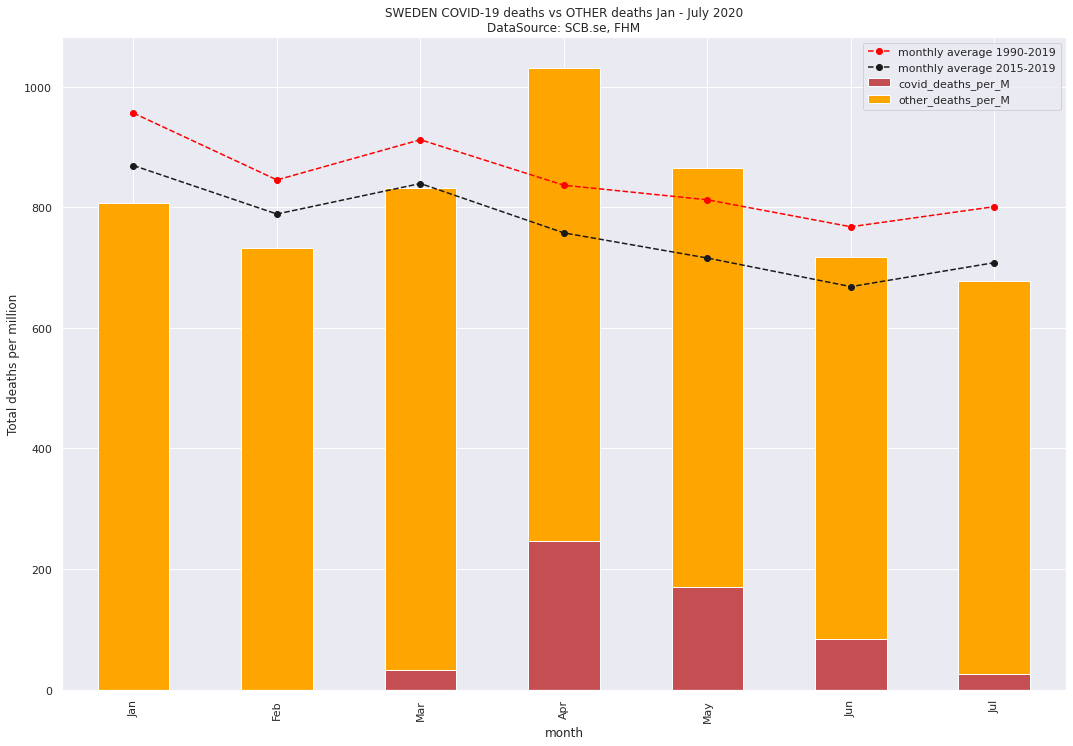

In [81]:
all_deaths.plot(title='SWEDEN COVID-19 deaths vs OTHER deaths Jan - {} 2020\nDataSource: SCB.se, FHM'.format(
    pd.Timestamp(last_complete_month).month_name()),
                kind='bar',x='month',color=['r','orange'],
                y=['covid_deaths_per_M','other_deaths_per_M'],stacked=True,figsize=(18,12))

plt.ylabel('Total deaths per million')
plt.plot(monthly_average.index,monthly_average,'o--',label='monthly average 1990-2019',color='red')
plt.plot(average_2015_2019.index,average_2015_2019,'o--',label='monthly average 2015-2019',color='k')

plt.legend(loc='upper right')
plt.savefig('scb_fhm_covid_vs_other_abs.jpg',format='jpg')

In [82]:
average_2015_2019

month
Jan    869.32
Feb    788.85
Mar    839.46
Apr    757.56
May    715.85
Jun    668.40
Jul    708.14
dtype: float64

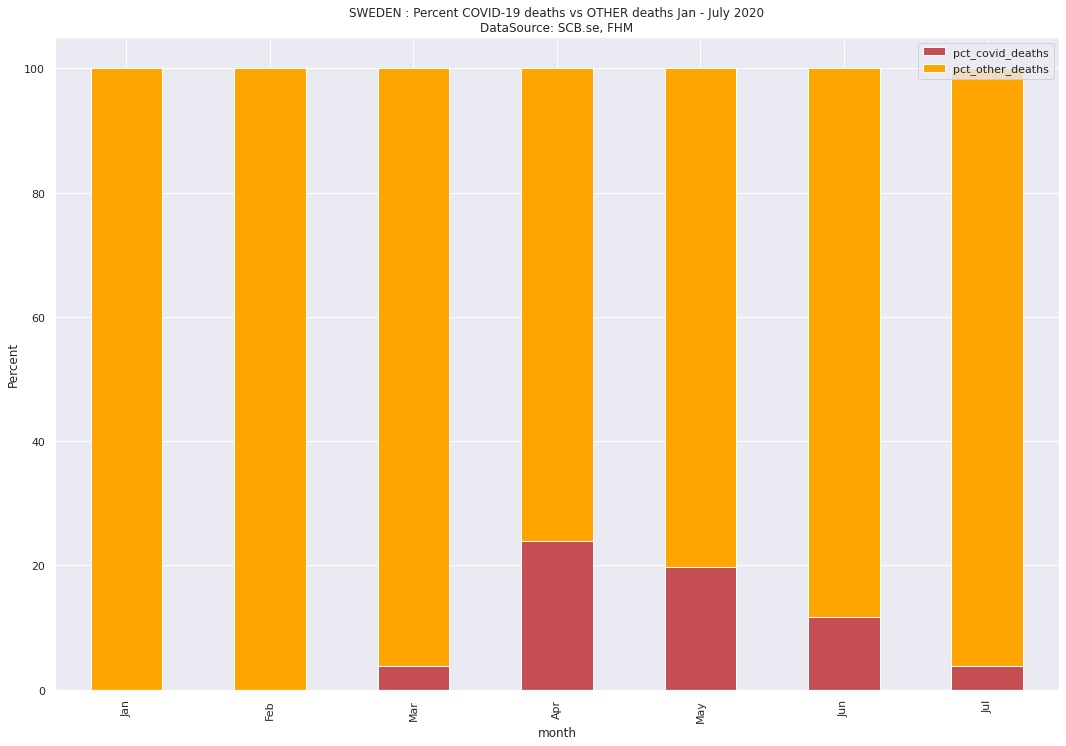

In [83]:
all_deaths.plot(title='SWEDEN : Percent COVID-19 deaths vs OTHER deaths Jan - {} 2020\nDataSource: SCB.se, FHM'.format(
    pd.Timestamp(last_complete_month).month_name()),
                kind='bar',x='month',color=['r','orange'],
                y=['pct_covid_deaths','pct_other_deaths'],stacked=True,figsize=(18,12))

plt.ylabel('Percent')
plt.savefig('scb_fhm_covid_vs_other_rel.jpg',format='jpg')

In [84]:
print (years.min())
print (years.max())
print (years)


month
Jan    806.98
Feb    727.10
Mar    756.62
Apr    716.03
May    681.49
Jun    644.26
Jul    674.36
dtype: float64
month
Jan    1149.97
Feb     967.89
Mar    1043.52
Apr    1030.59
May     924.54
Jun     886.35
Jul     928.21
dtype: float64
month      Jan     Feb      Mar      Apr     May     Jun     Jul
year                                                            
1990   1019.60  881.73   982.28   930.37  924.54  865.63  897.71
1991   1041.25  861.31   927.86   919.28  923.92  886.35  928.21
1992   1054.52  967.89   960.63   893.84  866.96  869.39  877.00
1993   1007.27  874.68  1043.52   902.21  861.49  833.62  860.23
1994   1045.83  828.42   881.35   818.18  845.50  805.77  877.25
1995    945.67  838.99   918.63   925.22  885.00  833.99  845.92
1996   1149.97  925.47   907.20   842.73  855.10  812.42  825.82
1997   1065.41  929.61   912.80   854.44  863.52  827.53  836.50
1998    915.97  891.14   978.33   905.20  841.26  794.32  836.83
1999    975.86  955.58  1027.64   848.85

In [85]:
years.sum(axis=1).sort_values(ascending=False)

year
1990    6501.86
1992    6490.23
1991    6488.17
1993    6383.02
1996    6318.70
1997    6289.80
1999    6283.55
2000    6281.43
2001    6205.89
2002    6203.49
1995    6193.44
1998    6163.05
2005    6108.49
2003    6103.12
1994    6102.30
2007    5906.35
2004    5876.38
2006    5855.32
2008    5833.53
2009    5763.68
2012    5724.54
2020    5661.80
2013    5616.36
2010    5615.20
2011    5567.26
2015    5535.02
2018    5435.64
2017    5400.57
2016    5341.10
2014    5335.69
2019    5025.49
dtype: float64

In [86]:
cum_mean_2015_2019 = years.sum(axis=1)
cum_mean_2015_2019 = cum_mean_2015_2019.loc[2015:2020].mean()
print (cum_mean_2015_2019)

cum_mean_1990_2019 = years.sum(axis=1)
cum_mean_1990_2019 = cum_mean_1990_2019.loc[1990:2020].mean()
print (cum_mean_1990_2019)

print (years.loc[2020].sum())

5399.936954863416
5922.918022046768
5661.800098334601


In [87]:
scb_2020_copy = scb_2020_orig.copy()
scb_2020_copy.reset_index(inplace=True)
#scb_2020_copy['Månad'] = scb_2020_copy['Månad'].apply(date_parser)


scb_2020_copy['Månad'] = pd.Categorical(scb_2020_copy['Månad'],['januari','februari','mars','april','maj','juni',
                                                      'juli','augusti','september','oktober','november','december'])

scb_2020_copy.sort_values('Månad',inplace=True)
scb_2020_copy.drop(['min_2015_2019','max_2015_2019'],axis=1,inplace=True)

scb_2020_copy['excess_2015'] = scb_2020_copy['2020'] - scb_2020_copy['2015-2019']
scb_2020_copy['excess_2015_cum'] = scb_2020_copy['excess_2015'].cumsum()
scb_2020_copy['2020_cum'] = scb_2020_copy['2020'].cumsum()
scb_2020_copy['2020_per_M'] = scb_2020_copy['2020'] / (curr_pop / 1e6)
scb_2020_copy['2020_per_M_cum'] = scb_2020_copy['2020_per_M'].cumsum()
scb_2020_copy['excess_2015_per_M'] = scb_2020_copy['excess_2015'] / (curr_pop / 1e6)
scb_2020_copy['excess_2015_per_M_cum'] = scb_2020_copy['excess_2015_per_M'].cumsum()
scb_2020_copy

,Månad,2020,2015-2019,excess_2015,excess_2015_cum,2020_cum,2020_per_M,2020_per_M_cum,excess_2015_per_M,excess_2015_per_M_cum
3,januari,8334.19,8807.94,-473.75,-473.75,8334.19,806.98,806.98,-45.87,-45.87
2,februari,7559.27,8190.12,-630.85,-1104.60,15893.46,731.95,1538.93,-61.08,-106.96
7,mars,8585.65,8485.73,99.92,-1004.68,24479.11,831.33,2370.26,9.67,-97.28
0,april,10643.54,7665.39,2978.15,1973.46,35122.65,1030.59,3400.86,288.37,191.09
6,maj,8929.49,7236.81,1692.68,3666.14,44052.14,864.62,4265.48,163.90,354.99
5,juni,7416.61,6734.58,682.03,4348.17,51468.74,718.14,4983.62,66.04,421.02
4,juli,7004.00,7132.48,-128.47,4219.70,58472.74,678.18,5661.80,-12.44,408.58
1,augusti,5535.26,6295.77,-760.51,3459.19,64008.00,535.97,6197.77,-73.64,334.95


In [88]:
death_df

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
January,8759.04,9000.66,9165.90,8808.70,9220.43,8357.36,10170.90,9426.33,8110.30,8647.51,...,8556.26,8638.99,8434.02,8790.94,8105.00,8673.68,8706.80,9301.92,8826.75,8396.78
February,7574.60,7445.27,8412.94,7649.18,7303.69,7414.59,8185.30,8224.81,7890.45,8467.79,...,7316.64,7274.21,8386.01,7933.76,7408.83,8100.11,7827.00,8042.23,8359.49,7509.16
March,8438.38,8020.52,8349.78,9125.66,7770.33,8118.40,8023.69,8076.12,8662.43,9106.34,...,8068.01,8143.71,8755.10,8566.90,7689.90,8674.68,8179.72,8265.70,9462.46,7814.06
April,7992.46,7946.36,7769.26,7889.91,7213.37,8176.64,7453.51,7559.75,8014.94,7522.02,...,7508.73,7519.35,7708.84,7909.75,7213.78,7738.75,7560.46,7747.60,7818.03,7394.83
May,7942.36,7986.45,7535.65,7533.83,7454.22,7821.22,7562.92,7640.12,7448.75,7559.16,...,7305.63,7310.23,7453.78,7197.59,7388.83,7358.37,7148.61,7504.07,6971.76,7168.16
June,7436.32,7661.74,7556.71,7290.09,7103.98,7370.42,7185.48,7321.66,7033.15,6958.77,...,6857.41,6712.88,6791.63,6837.51,6817.69,6852.86,6716.73,6851.68,6680.97,6653.64
July,7711.88,8023.53,7622.88,7522.80,7734.20,7475.84,7303.93,7401.02,7409.60,7419.61,...,7257.61,7194.16,7173.72,6932.53,7384.83,7127.13,7245.81,6941.87,7488.14,6964.56
August,7514.48,7545.49,7237.88,7289.09,7187.28,7295.12,7186.48,7378.92,7385.51,7537.08,...,7013.49,7023.06,7071.69,6935.53,7196.78,6820.83,7171.66,7011.02,6989.80,7051.81
September,7382.20,7638.69,7268.96,7330.22,7681.01,7364.39,7163.40,7329.69,7009.05,7228.85,...,7085.52,7105.11,6938.66,6843.51,6991.73,7013.02,6885.08,6927.84,6970.75,6875.29
October,7602.66,7479.34,7728.15,7561.92,7535.50,7547.12,7539.84,7653.18,7666.59,7635.47,...,7457.71,7616.40,7485.79,7279.61,7454.84,7246.25,7499.33,7603.29,7460.07,7558.31


In [89]:
scb_2020_abs = scb_2020_orig.reset_index()

scb_2020_abs['Månad'] = scb_2020_abs['Månad'].apply(date_parser)
scb_2020_abs['Månad'] = pd.Categorical(scb_2020_abs['Månad'],['January','February','March',
                                                             'April','May','June','July','August'])
scb_2020_abs.set_index('Månad',inplace=True)

<ipython-input-4-542dd1f79d06>:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(eng,'%B').date().strftime('%B')


In [90]:
scb_2020_abs.sort_index(inplace=True)
scb_2020_abs

,2020,2015-2019,min_2015_2019,max_2015_2019
Månad,,,,
January,8334.19,8807.94,8423.22,9325.41
February,7559.27,8190.12,7516.39,8375.03
March,8585.65,8485.73,7800.81,9463.14
April,10643.54,7665.39,7405.10,7824.30
May,8929.49,7236.81,6964.29,7512.79
June,7416.61,6734.58,6648.72,6838.03
July,7004.00,7132.48,6927.98,7458.51
August,5535.26,6295.77,6156.95,6420.72


In [91]:
scb_2020_abs = pd.concat([death_df,scb_2020_abs['2020']],axis=1)
death_df.reset_index(inplace=True)
death_df

year,index,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,January,8759.04,9000.66,9165.90,8808.70,9220.43,8357.36,10170.90,9426.33,8110.30,...,8556.26,8638.99,8434.02,8790.94,8105.00,8673.68,8706.80,9301.92,8826.75,8396.78
1,February,7574.60,7445.27,8412.94,7649.18,7303.69,7414.59,8185.30,8224.81,7890.45,...,7316.64,7274.21,8386.01,7933.76,7408.83,8100.11,7827.00,8042.23,8359.49,7509.16
2,March,8438.38,8020.52,8349.78,9125.66,7770.33,8118.40,8023.69,8076.12,8662.43,...,8068.01,8143.71,8755.10,8566.90,7689.90,8674.68,8179.72,8265.70,9462.46,7814.06
3,April,7992.46,7946.36,7769.26,7889.91,7213.37,8176.64,7453.51,7559.75,8014.94,...,7508.73,7519.35,7708.84,7909.75,7213.78,7738.75,7560.46,7747.60,7818.03,7394.83
4,May,7942.36,7986.45,7535.65,7533.83,7454.22,7821.22,7562.92,7640.12,7448.75,...,7305.63,7310.23,7453.78,7197.59,7388.83,7358.37,7148.61,7504.07,6971.76,7168.16
5,June,7436.32,7661.74,7556.71,7290.09,7103.98,7370.42,7185.48,7321.66,7033.15,...,6857.41,6712.88,6791.63,6837.51,6817.69,6852.86,6716.73,6851.68,6680.97,6653.64
6,July,7711.88,8023.53,7622.88,7522.80,7734.20,7475.84,7303.93,7401.02,7409.60,...,7257.61,7194.16,7173.72,6932.53,7384.83,7127.13,7245.81,6941.87,7488.14,6964.56
7,August,7514.48,7545.49,7237.88,7289.09,7187.28,7295.12,7186.48,7378.92,7385.51,...,7013.49,7023.06,7071.69,6935.53,7196.78,6820.83,7171.66,7011.02,6989.80,7051.81
8,September,7382.20,7638.69,7268.96,7330.22,7681.01,7364.39,7163.40,7329.69,7009.05,...,7085.52,7105.11,6938.66,6843.51,6991.73,7013.02,6885.08,6927.84,6970.75,6875.29
9,October,7602.66,7479.34,7728.15,7561.92,7535.50,7547.12,7539.84,7653.18,7666.59,...,7457.71,7616.40,7485.79,7279.61,7454.84,7246.25,7499.33,7603.29,7460.07,7558.31


In [92]:
scb_2020_abs.reset_index(inplace=True)

In [93]:
scb_2020_abs['index'] = pd.Categorical(scb_2020_abs['index'],['January','February','March','April',
                                                             'May','June','July','August',
                                                             'September','October','November','December'])

scb_2020_abs.sort_values('index',inplace=True)
scb_2020_abs.set_index('index',inplace=True)
scb_2020_abs
                                       
                                       

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
index,,,,,,,,,,,,,,,,,,,,,
January,8759.04,9000.66,9165.90,8808.70,9220.43,8357.36,10170.90,9426.33,8110.30,8647.51,...,8638.99,8434.02,8790.94,8105.00,8673.68,8706.80,9301.92,8826.75,8396.78,8334.19
February,7574.60,7445.27,8412.94,7649.18,7303.69,7414.59,8185.30,8224.81,7890.45,8467.79,...,7274.21,8386.01,7933.76,7408.83,8100.11,7827.00,8042.23,8359.49,7509.16,7559.27
March,8438.38,8020.52,8349.78,9125.66,7770.33,8118.40,8023.69,8076.12,8662.43,9106.34,...,8143.71,8755.10,8566.90,7689.90,8674.68,8179.72,8265.70,9462.46,7814.06,8585.65
April,7992.46,7946.36,7769.26,7889.91,7213.37,8176.64,7453.51,7559.75,8014.94,7522.02,...,7519.35,7708.84,7909.75,7213.78,7738.75,7560.46,7747.60,7818.03,7394.83,10643.54
May,7942.36,7986.45,7535.65,7533.83,7454.22,7821.22,7562.92,7640.12,7448.75,7559.16,...,7310.23,7453.78,7197.59,7388.83,7358.37,7148.61,7504.07,6971.76,7168.16,8929.49
June,7436.32,7661.74,7556.71,7290.09,7103.98,7370.42,7185.48,7321.66,7033.15,6958.77,...,6712.88,6791.63,6837.51,6817.69,6852.86,6716.73,6851.68,6680.97,6653.64,7416.61
July,7711.88,8023.53,7622.88,7522.80,7734.20,7475.84,7303.93,7401.02,7409.60,7419.61,...,7194.16,7173.72,6932.53,7384.83,7127.13,7245.81,6941.87,7488.14,6964.56,7004.00
August,7514.48,7545.49,7237.88,7289.09,7187.28,7295.12,7186.48,7378.92,7385.51,7537.08,...,7023.06,7071.69,6935.53,7196.78,6820.83,7171.66,7011.02,6989.80,7051.81,5535.26
September,7382.20,7638.69,7268.96,7330.22,7681.01,7364.39,7163.40,7329.69,7009.05,7228.85,...,7105.11,6938.66,6843.51,6991.73,7013.02,6885.08,6927.84,6970.75,6875.29,NaN


In [94]:
total_abs_ytd = scb_2020_abs[:pd.to_datetime(last_complete_month).month_name()].sum()
total_abs_ytd

1990    55855.04
1991    56084.54
1992    56413.12
1993    55820.17
1994    53800.21
1995    54734.46
1996    55885.73
1997    55649.81
1998    54569.62
1999    55681.19
2000    55796.65
2001    55289.10
2002    55464.09
2003    54779.55
2004    52954.38
2005    55268.14
2006    53361.05
2007    54237.60
2008    53997.13
2009    53836.72
2010    52870.29
2011    52793.52
2012    54703.09
2013    54168.98
2014    52008.86
2015    54525.58
2016    53385.14
2017    54655.07
2018    55607.60
2019    51901.19
2020    58472.74
dtype: float64

In [95]:
year_pairs_abs = total_abs_ytd.iloc[1::2].reset_index() + total_abs_ytd.iloc[2::2].reset_index()
year_pairs_abs['index'] = year_pairs_abs['index'].apply(lambda x : x[:4] + '_' + x[4:])
year_pairs_abs.columns = ['years','deaths']
year_pairs_abs

,years,deaths
0,1991_1992,112497.66
1,1993_1994,109620.38
2,1995_1996,110620.19
3,1997_1998,110219.43
4,1999_2000,111477.85
5,2001_2002,110753.19
6,2003_2004,107733.93
7,2005_2006,108629.20
8,2007_2008,108234.73
9,2009_2010,106707.01


In [96]:
pop = scb_pop.T[1:]

In [97]:
pop = pop.iloc[::2].reset_index()
pop.columns=['year','pop']
pop

,year,pop
0,1991,8644119
1,1993,8745109
2,1995,8837496
3,1997,8847625
4,1999,8861426
5,2001,8909128
6,2003,8975670
7,2005,9047752
8,2007,9182927
9,2009,9340682


In [98]:
year_pairs_abs['dead_per_M'] = year_pairs_abs['deaths'] / (pop['pop'] / 1e6)
year_pairs_abs.set_index('years',inplace=True)
year_pairs_abs

,deaths,dead_per_M
years,,
1991_1992,112497.66,13014.36
1993_1994,109620.38,12535.05
1995_1996,110620.19,12517.14
1997_1998,110219.43,12457.52
1999_2000,111477.85,12580.12
2001_2002,110753.19,12431.43
2003_2004,107733.93,12002.88
2005_2006,108629.20,12006.21
2007_2008,108234.73,11786.52


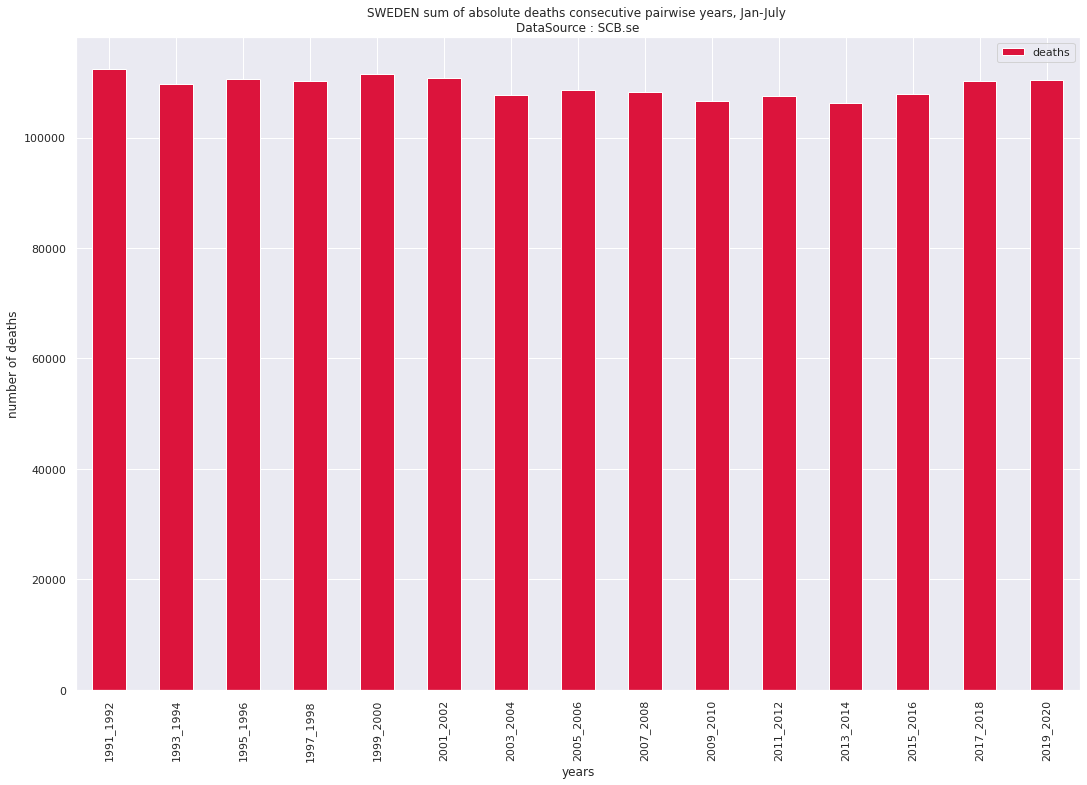

In [99]:
year_pairs_abs.plot(figsize=(18,12),y='deaths',kind='bar',color='crimson',
                   title='SWEDEN sum of absolute deaths consecutive pairwise years, Jan-{} \nDataSource : SCB.se'.format(
                   pd.to_datetime(last_complete_month).month_name()))
plt.ylabel('number of deaths')

plt.savefig('pair_abs_deaths.jpg',format='jpg',dpi=400)

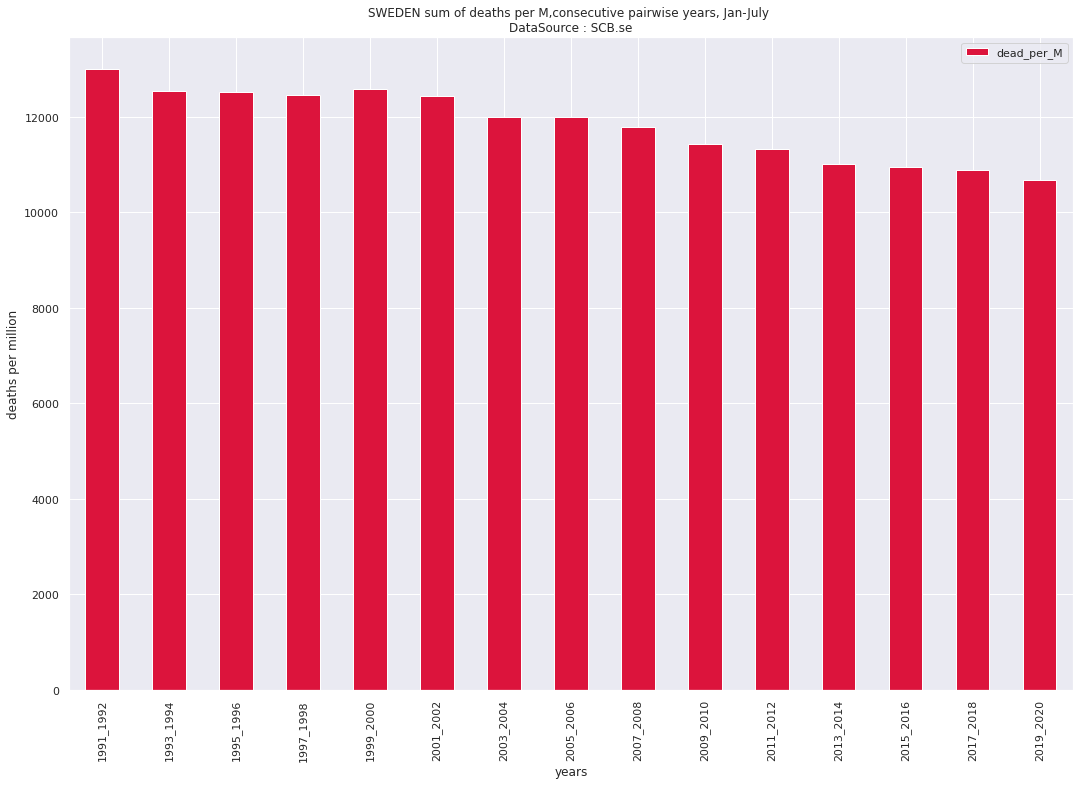

In [100]:
year_pairs_abs.plot(figsize=(18,12),y='dead_per_M',kind='bar',color='crimson',
                   title='SWEDEN sum of deaths per M,consecutive pairwise years, Jan-{} \nDataSource : SCB.se'.format(
                   pd.to_datetime(last_complete_month).month_name()))
plt.ylabel('deaths per million')

plt.savefig('pair_rel_deaths.jpg',format='jpg',dpi=400)

In [101]:
pd.to_datetime(last_complete_month).month_name()

'July'

In [102]:
deaths_per_m_grouped_sums_1990_2020_YTD.sum(axis=1)



year
1990    11077.30
1991    11013.50
1992    10896.21
1993    11092.83
1994    10417.43
1995    10631.41
1996    10643.11
1997    10548.14
1998    10533.95
1999    10689.70
2000    10521.58
2001    10523.14
2002    10626.47
2003    10357.00
2004    10046.39
2005    10136.22
2006    10004.88
2007     9989.08
2008     9879.60
2009     9643.84
2010     9610.36
2011     9484.27
2012     9621.08
2013     9373.07
2014     9128.22
2015     9228.18
2016     9102.61
2017     9087.92
2018     9011.08
2019     8595.04
2020     6197.77
dtype: float64

In [103]:
last_date

datetime.date(2020, 8, 28)

In [104]:
deaths_per_m_grouped_sums_1990_2020_YTD


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1990,1019.60,881.73,982.28,930.37,924.54,865.63,897.71,874.73,859.33,884.99,918.94,1037.45
1991,1041.25,861.31,927.86,919.28,923.92,886.35,928.21,872.90,883.69,865.25,911.98,991.51
1992,1054.52,967.89,960.63,893.84,866.96,869.39,877.00,832.70,836.28,889.11,891.76,956.13
1993,1007.27,874.68,1043.52,902.21,861.49,833.62,860.23,833.50,838.21,864.70,905.19,1268.21
1994,1045.83,828.42,881.35,818.18,845.50,805.77,877.25,815.22,871.22,854.72,855.29,918.69
1995,945.67,838.99,918.63,925.22,885.00,833.99,845.92,825.47,833.31,853.99,875.69,1049.51
1996,1149.97,925.47,907.20,842.73,855.10,812.42,825.82,812.54,809.93,852.49,855.89,993.57
1997,1065.41,929.61,912.80,854.44,863.52,827.53,836.50,834.00,828.44,865.00,815.83,915.07
1998,915.97,891.14,978.33,905.20,841.26,794.32,836.83,834.11,791.60,865.86,889.55,989.78


In [105]:
first_part_of_year = ['Aug','Sep','Oct','Nov','Dec']
second_part_of_year = ['Jan','Feb','Mar','Apr','May','Jun','Jul']


first = deaths_per_m_grouped_sums_1990_2020_YTD[first_part_of_year][1:]
second = deaths_per_m_grouped_sums_1990_2020_YTD[second_part_of_year][1:]

first = first[::2]
second = second[1::2]
print (first.sum(axis=1))
second.sum(axis=1)


year
1991    4525.33
1993    4709.81
1995    4437.97
1997    4258.34
1999    4406.15
2001    4317.25
2003    4253.88
2005    4027.72
2007    4082.73
2009    3880.15
2011    3917.01
2013    3756.72
2015    3693.16
2017    3687.36
2019    3569.55
dtype: float64


year
1992    6490.23
1994    6102.30
1996    6318.70
1998    6163.05
2000    6281.43
2002    6203.49
2004    5876.38
2006    5855.32
2008    5833.53
2010    5615.20
2012    5724.54
2014    5335.69
2016    5341.10
2018    5435.64
2020    5661.80
dtype: float64

In [106]:
season_deaths_per_m = pd.concat([first.reset_index(drop=True),second.reset_index(drop=True)],axis=1)
season_deaths_per_m.sum(axis=1)

0     11015.55
1     10812.11
2     10756.67
3     10421.39
4     10687.59
5     10520.74
6     10130.27
7      9883.05
8      9916.25
9      9495.35
10     9641.55
11     9092.41
12     9034.27
13     9123.00
14     9231.35
dtype: float64

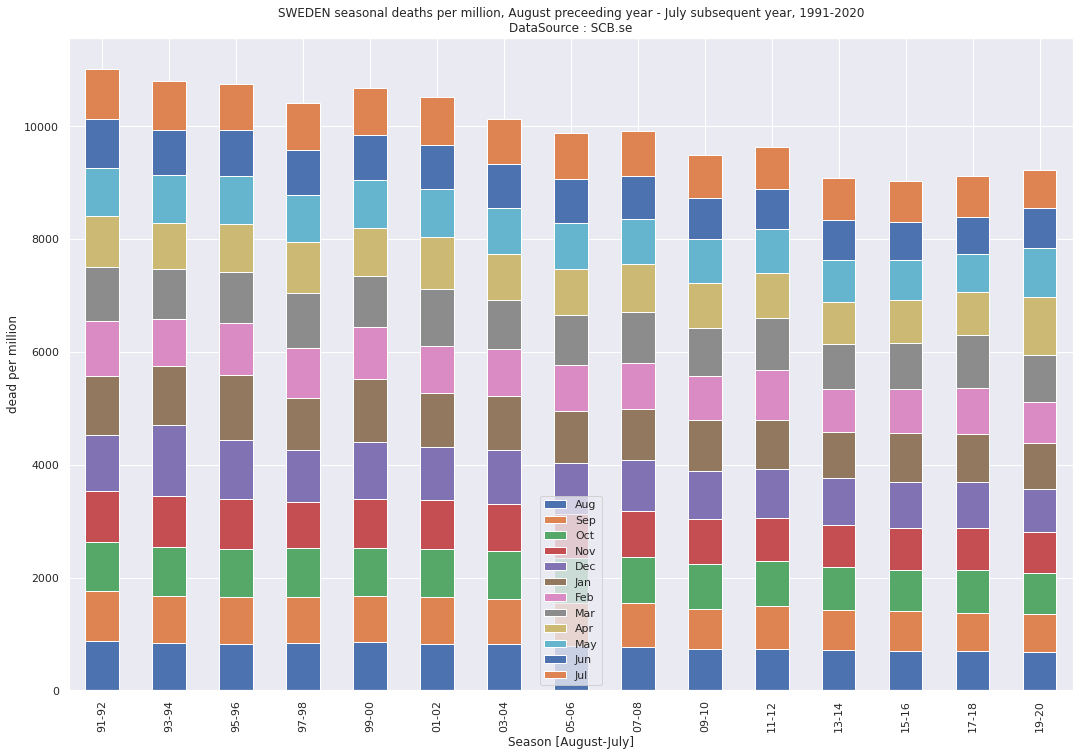

In [107]:
title = 'SWEDEN seasonal deaths per million, August preceeding year - July subsequent year,'\
' 1991-2020\nDataSource : SCB.se'

xlabels = ['91-92','93-94','95-96','97-98','99-00','01-02','03-04','05-06','07-08',
          '09-10','11-12','13-14','15-16','17-18','19-20']

season_deaths_per_m.plot(figsize=(18,12),kind='bar',stacked=True,title=title)
plt.xticks(range(len(season_deaths_per_m.index)),xlabels)
plt.legend(loc='lower center')
plt.xlabel('Season [August-July]')
plt.ylabel('dead per million')
plt.savefig('sweden_seasonal_deaths_per_m.jpg',format='jpg',dpi=400)

In [108]:
death_df.rename(columns={'index' : 'Månad'},inplace=True)

In [109]:
print (scb_2020_orig)
scb_2020_orig.index = scb_2020_orig.reset_index()['Månad'].apply(date_parser)

              2020  2015-2019  min_2015_2019  max_2015_2019
Månad                                                      
april     10643.54    7665.39        7405.10        7824.30
augusti    5535.26    6295.77        6156.95        6420.72
februari   7559.27    8190.12        7516.39        8375.03
januari    8334.19    8807.94        8423.22        9325.41
juli       7004.00    7132.48        6927.98        7458.51
juni       7416.61    6734.58        6648.72        6838.03
maj        8929.49    7236.81        6964.29        7512.79
mars       8585.65    8485.73        7800.81        9463.14


<ipython-input-4-542dd1f79d06>:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(eng,'%B').date().strftime('%B')


In [110]:
scb_2020_orig

,2020,2015-2019,min_2015_2019,max_2015_2019
Månad,,,,
April,10643.54,7665.39,7405.10,7824.30
August,5535.26,6295.77,6156.95,6420.72
February,7559.27,8190.12,7516.39,8375.03
January,8334.19,8807.94,8423.22,9325.41
July,7004.00,7132.48,6927.98,7458.51
June,7416.61,6734.58,6648.72,6838.03
May,8929.49,7236.81,6964.29,7512.79
March,8585.65,8485.73,7800.81,9463.14


In [111]:
abs_deaths = death_df.set_index('Månad').join(scb_2020_orig['2020'])

In [112]:
abs_deaths = abs_deaths.T
abs_deaths

Månad,January,February,March,April,May,June,July,August,September,October,November,December
1990,8759.04,7574.60,8438.38,7992.46,7942.36,7436.32,7711.88,7514.48,7382.20,7602.66,7894.26,8912.36
1991,9000.66,7445.27,8020.52,7946.36,7986.45,7661.74,8023.53,7545.49,7638.69,7479.34,7883.22,8570.73
1992,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88,7237.88,7268.96,7728.15,7751.21,8310.67
1993,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80,7289.09,7330.22,7561.92,7915.99,11090.61
1994,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20,7187.28,7681.01,7535.50,7540.52,8099.48
1995,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84,7295.12,7364.39,7547.12,7738.89,9275.02
1996,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93,7186.48,7163.40,7539.84,7569.95,8787.61
1997,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02,7378.92,7329.69,7653.18,7218.18,8096.22
1998,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60,7385.51,7009.05,7666.59,7876.40,8763.83
1999,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61,7537.08,7228.85,7635.47,7654.55,8988.87


In [113]:
first_season_half = abs_deaths.loc[:,'August' : 'December'][1::2]
second_season_half = abs_deaths.loc[:,: 'July'][2::2]

print (first_season_half)
second_season_half

Månad   August  September  October  November  December
1991   7545.49    7638.69  7479.34   7883.22   8570.73
1993   7289.09    7330.22  7561.92   7915.99  11090.61
1995   7295.12    7364.39  7547.12   7738.89   9275.02
1997   7378.92    7329.69  7653.18   7218.18   8096.22
1999   7537.08    7228.85  7635.47   7654.55   8988.87
2001   7352.86    7314.69  7617.04   7739.59   8438.71
2003   7298.58    7254.39  7675.26   7420.13   8533.09
2005   7128.01    6907.52  7163.09   7159.08   8084.16
2007   7012.55    7188.82  7514.30   7487.26   8288.47
2009   6801.06    6715.95  7444.92   7395.85   7885.50
2011   7023.06    7105.11  7616.40   7195.16   8204.74
2013   6935.53    6843.51  7279.61   7239.60   7934.76
2015   6820.83    7013.02  7246.25   7350.36   7950.96
2017   7011.02    6927.84  7603.29   7498.06   8276.73
2019   7051.81    6875.29  7558.31   7460.02   7919.37


Månad,January,February,March,April,May,June,July
1992,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88
1994,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20
1996,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93
1998,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60
2000,9862.42,8214.66,8106.22,7536.89,7523.83,7060.94,7491.70
2002,8506.90,7478.56,9048.19,8182.54,7601.08,7083.90,7562.92
2004,8741.41,7391.25,7890.16,7276.81,7454.49,7002.76,7197.51
2006,8431.70,7370.85,8191.28,7399.90,7401.91,7168.50,7396.90
2008,8373.25,7560.26,8376.26,7851.62,7412.08,7080.67,7342.99
2010,8556.26,7316.64,8068.01,7508.73,7305.63,6857.41,7257.61


In [114]:
season_deaths_abs= pd.concat([first_season_half.reset_index(drop=True),second_season_half.reset_index(drop=True)],axis=1)
season_deaths_abs.sum(axis=1)

0     95530.59
1     94988.03
2     95106.27
3     92245.81
4     94841.46
5     93926.99
6     91135.83
7     89802.91
8     91488.53
9     89113.57
10    91847.57
11    88241.88
12    89766.56
13    92924.53
14    95337.55
dtype: float64

In [115]:
scb_pop['2020'] = scb_pop['2019']

In [116]:
ave_pop = ((scb_pop.T + scb_pop.T.shift()) / 2)[::2].reset_index(drop=True).dropna().reset_index(drop=True)
ave_pop

,0
0,8.67e+06
1,8.78e+06
2,8.84e+06
3,8.85e+06
4,8.87e+06
5,8.92e+06
6,8.99e+06
7,9.08e+06
8,9.22e+06
9,9.38e+06


In [117]:
season_deaths_abs = season_deaths_abs[['January','February','March','April','May','June',
                                      'July','August','September','October','November','December']]

season_deaths_abs.index = ['91-92','93-94','95-96','97-98','99-00','01-02','03-04',
                          '05-06','07-08','09-10','11-12','13-14','15-16',
                          '17-18','19-20']

season_deaths_abs

Månad,January,February,March,April,May,June,July,August,September,October,November,December
91-92,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88,7545.49,7638.69,7479.34,7883.22,8570.73
93-94,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20,7289.09,7330.22,7561.92,7915.99,11090.61
95-96,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93,7295.12,7364.39,7547.12,7738.89,9275.02
97-98,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60,7378.92,7329.69,7653.18,7218.18,8096.22
99-00,9862.42,8214.66,8106.22,7536.89,7523.83,7060.94,7491.70,7537.08,7228.85,7635.47,7654.55,8988.87
01-02,8506.90,7478.56,9048.19,8182.54,7601.08,7083.90,7562.92,7352.86,7314.69,7617.04,7739.59,8438.71
03-04,8741.41,7391.25,7890.16,7276.81,7454.49,7002.76,7197.51,7298.58,7254.39,7675.26,7420.13,8533.09
05-06,8431.70,7370.85,8191.28,7399.90,7401.91,7168.50,7396.90,7128.01,6907.52,7163.09,7159.08,8084.16
07-08,8373.25,7560.26,8376.26,7851.62,7412.08,7080.67,7342.99,7012.55,7188.82,7514.30,7487.26,8288.47
09-10,8556.26,7316.64,8068.01,7508.73,7305.63,6857.41,7257.61,6801.06,6715.95,7444.92,7395.85,7885.50


In [118]:
season_tot_deaths_abs = season_deaths_abs.sum(axis=1)
season_tot_deaths_per_m = season_tot_deaths_abs.reset_index(drop=True) / (ave_pop[0] / 1e6)

season_tot_deaths_per_m.index = ['91-92','93-94','95-96','97-98','99-00','01-02','03-04',
                          '05-06','07-08','09-10','11-12','13-14','15-16',
                          '17-18','19-20']
season_tot_deaths_per_m

91-92    11020.98
93-94    10817.76
95-96    10757.41
97-98    10422.11
99-00    10689.84
01-02    10524.08
03-04    10133.49
05-06     9889.64
07-08     9923.23
09-10     9502.28
11-12     9648.49
13-14     9100.75
15-16     9046.23
17-18     9132.44
19-20     9231.35
dtype: float64

<AxesSubplot:>

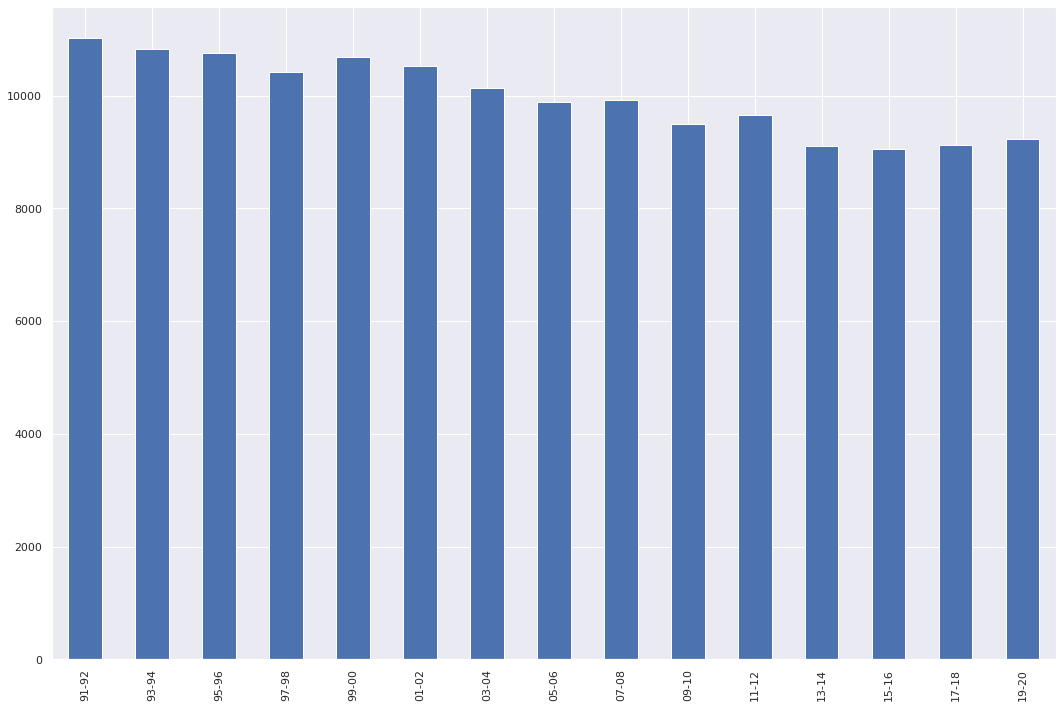

In [119]:
season_tot_deaths_per_m.plot(figsize=(18,12),kind='bar')

In [120]:
second_season_half


Månad,January,February,March,April,May,June,July
1992,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88
1994,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20
1996,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93
1998,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60
2000,9862.42,8214.66,8106.22,7536.89,7523.83,7060.94,7491.70
2002,8506.90,7478.56,9048.19,8182.54,7601.08,7083.90,7562.92
2004,8741.41,7391.25,7890.16,7276.81,7454.49,7002.76,7197.51
2006,8431.70,7370.85,8191.28,7399.90,7401.91,7168.50,7396.90
2008,8373.25,7560.26,8376.26,7851.62,7412.08,7080.67,7342.99
2010,8556.26,7316.64,8068.01,7508.73,7305.63,6857.41,7257.61


In [121]:
abs_deaths

Månad,January,February,March,April,May,June,July,August,September,October,November,December
1990,8759.04,7574.60,8438.38,7992.46,7942.36,7436.32,7711.88,7514.48,7382.20,7602.66,7894.26,8912.36
1991,9000.66,7445.27,8020.52,7946.36,7986.45,7661.74,8023.53,7545.49,7638.69,7479.34,7883.22,8570.73
1992,9165.90,8412.94,8349.78,7769.26,7535.65,7556.71,7622.88,7237.88,7268.96,7728.15,7751.21,8310.67
1993,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80,7289.09,7330.22,7561.92,7915.99,11090.61
1994,9220.43,7303.69,7770.33,7213.37,7454.22,7103.98,7734.20,7187.28,7681.01,7535.50,7540.52,8099.48
1995,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84,7295.12,7364.39,7547.12,7738.89,9275.02
1996,10170.90,8185.30,8023.69,7453.51,7562.92,7185.48,7303.93,7186.48,7163.40,7539.84,7569.95,8787.61
1997,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02,7378.92,7329.69,7653.18,7218.18,8096.22
1998,8110.30,7890.45,8662.43,8014.94,7448.75,7033.15,7409.60,7385.51,7009.05,7666.59,7876.40,8763.83
1999,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61,7537.08,7228.85,7635.47,7654.55,8988.87


In [122]:
first_season_half_even = abs_deaths.loc[:,'August' : 'December'][2::2]
first_season_half_even = first_season_half_even[:-1]
second_season_half_even = abs_deaths.loc[:,: 'July'][3::2]

print (first_season_half_even)
second_season_half_even

Månad   August  September  October  November  December
1992   7237.88    7268.96  7728.15   7751.21   8310.67
1994   7187.28    7681.01  7535.50   7540.52   8099.48
1996   7186.48    7163.40  7539.84   7569.95   8787.61
1998   7385.51    7009.05  7666.59   7876.40   8763.83
2000   7285.86    7238.66  7467.60   7479.65   8192.57
2002   7642.26    7211.44  8104.21   7752.72   8834.29
2004   7235.65    7025.85  7522.75   7463.52   8329.84
2006   7328.78    7198.55  7553.17   7635.31   8100.13
2008   7047.63    7130.73  7388.05   7452.13   8433.33
2010   7013.49    7085.52  7457.71   7453.71   8606.28
2012   7071.69    6938.66  7485.79   7297.75   8441.02
2014   7196.78    6991.73  7454.84   7253.79   8070.00
2016   7171.66    6885.08  7499.33   7565.47   8475.33
2018   6989.80    6970.75  7460.07   7121.16   8035.62


Månad,January,February,March,April,May,June,July
1993,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80
1995,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84
1997,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02
1999,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61
2001,8311.14,7504.54,8350.32,8005.78,7935.47,7504.54,7677.31
2003,9358.78,7643.12,8341.24,7733.52,7303.61,6909.85,7489.43
2005,8235.50,7885.71,9354.01,7985.94,7446.73,7158.08,7202.18
2007,8443.70,7697.58,8749.16,7803.74,7261.93,7069.64,7211.85
2009,9407.53,7922.55,8033.70,7362.81,7355.80,6823.09,6931.23
2011,8638.99,7274.21,8143.71,7519.35,7310.23,6712.88,7194.16


In [123]:
season_deaths_abs_even = pd.concat([first_season_half_even.reset_index(drop=True),
                                    second_season_half_even.reset_index(drop=True)],axis=1)

season_deaths_abs_even


Månad,August,September,October,November,December,January,February,March,April,May,June,July
0,7237.88,7268.96,7728.15,7751.21,8310.67,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80
1,7187.28,7681.01,7535.50,7540.52,8099.48,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84
2,7186.48,7163.40,7539.84,7569.95,8787.61,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02
3,7385.51,7009.05,7666.59,7876.40,8763.83,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61
4,7285.86,7238.66,7467.60,7479.65,8192.57,8311.14,7504.54,8350.32,8005.78,7935.47,7504.54,7677.31
5,7642.26,7211.44,8104.21,7752.72,8834.29,9358.78,7643.12,8341.24,7733.52,7303.61,6909.85,7489.43
6,7235.65,7025.85,7522.75,7463.52,8329.84,8235.50,7885.71,9354.01,7985.94,7446.73,7158.08,7202.18
7,7328.78,7198.55,7553.17,7635.31,8100.13,8443.70,7697.58,8749.16,7803.74,7261.93,7069.64,7211.85
8,7047.63,7130.73,7388.05,7452.13,8433.33,9407.53,7922.55,8033.70,7362.81,7355.80,6823.09,6931.23
9,7013.49,7085.52,7457.71,7453.71,8606.28,8638.99,7274.21,8143.71,7519.35,7310.23,6712.88,7194.16


In [124]:
season_deaths_abs_even = season_deaths_abs_even[['January','February','March','April','May','June',
                                      'July','August','September','October','November','December']]

season_deaths_abs_even.index = ['92-93','94-95','96-97','98-99','00-01','02-03','04-05',
                          '06-07','08-09','10-11','12-13','14-15','16-17',
                          '18-19']

season_deaths_abs_even

Månad,January,February,March,April,May,June,July,August,September,October,November,December
92-93,8808.70,7649.18,9125.66,7889.91,7533.83,7290.09,7522.80,7237.88,7268.96,7728.15,7751.21,8310.67
94-95,8357.36,7414.59,8118.40,8176.64,7821.22,7370.42,7475.84,7187.28,7681.01,7535.50,7540.52,8099.48
96-97,9426.33,8224.81,8076.12,7559.75,7640.12,7321.66,7401.02,7186.48,7163.40,7539.84,7569.95,8787.61
98-99,8647.51,8467.79,9106.34,7522.02,7559.16,6958.77,7419.61,7385.51,7009.05,7666.59,7876.40,8763.83
00-01,8311.14,7504.54,8350.32,8005.78,7935.47,7504.54,7677.31,7285.86,7238.66,7467.60,7479.65,8192.57
02-03,9358.78,7643.12,8341.24,7733.52,7303.61,6909.85,7489.43,7642.26,7211.44,8104.21,7752.72,8834.29
04-05,8235.50,7885.71,9354.01,7985.94,7446.73,7158.08,7202.18,7235.65,7025.85,7522.75,7463.52,8329.84
06-07,8443.70,7697.58,8749.16,7803.74,7261.93,7069.64,7211.85,7328.78,7198.55,7553.17,7635.31,8100.13
08-09,9407.53,7922.55,8033.70,7362.81,7355.80,6823.09,6931.23,7047.63,7130.73,7388.05,7452.13,8433.33
10-11,8638.99,7274.21,8143.71,7519.35,7310.23,6712.88,7194.16,7013.49,7085.52,7457.71,7453.71,8606.28


In [125]:
season_even_tot_deaths_abs = season_deaths_abs_even.sum(axis=1)
season_even_tot_deaths_abs

92-93    94117.05
94-95    92778.25
96-97    93897.08
98-99    94382.57
00-01    92953.45
02-03    94324.45
04-05    92845.76
06-07    92053.54
08-09    91288.59
10-11    90410.23
12-13    91403.89
14-15    91492.72
16-17    92251.93
18-19    88478.59
dtype: float64

In [126]:
scb_pop.T

,0
1990,8590630
1991,8644119
1992,8692013
1993,8745109
1994,8816381
1995,8837496
1996,8844499
1997,8847625
1998,8854322
1999,8861426


In [127]:
ava_pop_even = ((scb_pop.T.loc['1992':] + scb_pop.T.loc['1992':].shift(-1)) / 2)[::2].dropna().astype(int).reset_index(drop=True)
ava_pop_even

,0
0,8718561
1,8826938
2,8846062
3,8857874
4,8895960
5,8958229
6,9029572
7,9148092
8,9298514
9,9449212


In [128]:
season_even_tot_deaths_per_m = season_even_tot_deaths_abs.reset_index(drop=True) / (ava_pop_even[0] / 1e6)
season_even_tot_deaths_per_m.dropna(inplace=True)

season_even_tot_deaths_per_m

0     10795.02
1     10510.81
2     10614.56
3     10655.22
4     10448.95
5     10529.36
6     10282.41
7     10062.59
8      9817.55
9      9568.02
10     9520.86
11     9336.77
12     9172.27
13     8607.80
dtype: float64

In [129]:
season_even_tot_deaths_per_m.index = ['92-93','94-95','96-97','98-99','00-01','02-03','04-05',
                          '06-07','08-09','10-11','12-13','14-15','16-17',
                          '18-19']

season_even_tot_deaths_per_m

92-93    10795.02
94-95    10510.81
96-97    10614.56
98-99    10655.22
00-01    10448.95
02-03    10529.36
04-05    10282.41
06-07    10062.59
08-09     9817.55
10-11     9568.02
12-13     9520.86
14-15     9336.77
16-17     9172.27
18-19     8607.80
dtype: float64

In [130]:
all_season_deaths_per_m = pd.concat([season_tot_deaths_per_m,season_even_tot_deaths_per_m])
all_season_deaths_per_m

91-92    11020.98
93-94    10817.76
95-96    10757.41
97-98    10422.11
99-00    10689.84
01-02    10524.08
03-04    10133.49
05-06     9889.64
07-08     9923.23
09-10     9502.28
11-12     9648.49
13-14     9100.75
15-16     9046.23
17-18     9132.44
19-20     9231.35
92-93    10795.02
94-95    10510.81
96-97    10614.56
98-99    10655.22
00-01    10448.95
02-03    10529.36
04-05    10282.41
06-07    10062.59
08-09     9817.55
10-11     9568.02
12-13     9520.86
14-15     9336.77
16-17     9172.27
18-19     8607.80
dtype: float64

In [131]:
new_index = ['91-92','92-93','93-94','94-95','95-96','96-97','97-98','98-99',
            '99-00','00-01','01-02','02-03','03-04','04-05','05-06','06-07',
            '07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15',
            '15-16','16-17','17-18','18-19','19-20']

all_season_deaths_per_m = all_season_deaths_per_m.reindex(new_index)
all_season_deaths_per_m

91-92    11020.98
92-93    10795.02
93-94    10817.76
94-95    10510.81
95-96    10757.41
96-97    10614.56
97-98    10422.11
98-99    10655.22
99-00    10689.84
00-01    10448.95
01-02    10524.08
02-03    10529.36
03-04    10133.49
04-05    10282.41
05-06     9889.64
06-07    10062.59
07-08     9923.23
08-09     9817.55
09-10     9502.28
10-11     9568.02
11-12     9648.49
12-13     9520.86
13-14     9100.75
14-15     9336.77
15-16     9046.23
16-17     9172.27
17-18     9132.44
18-19     8607.80
19-20     9231.35
dtype: float64

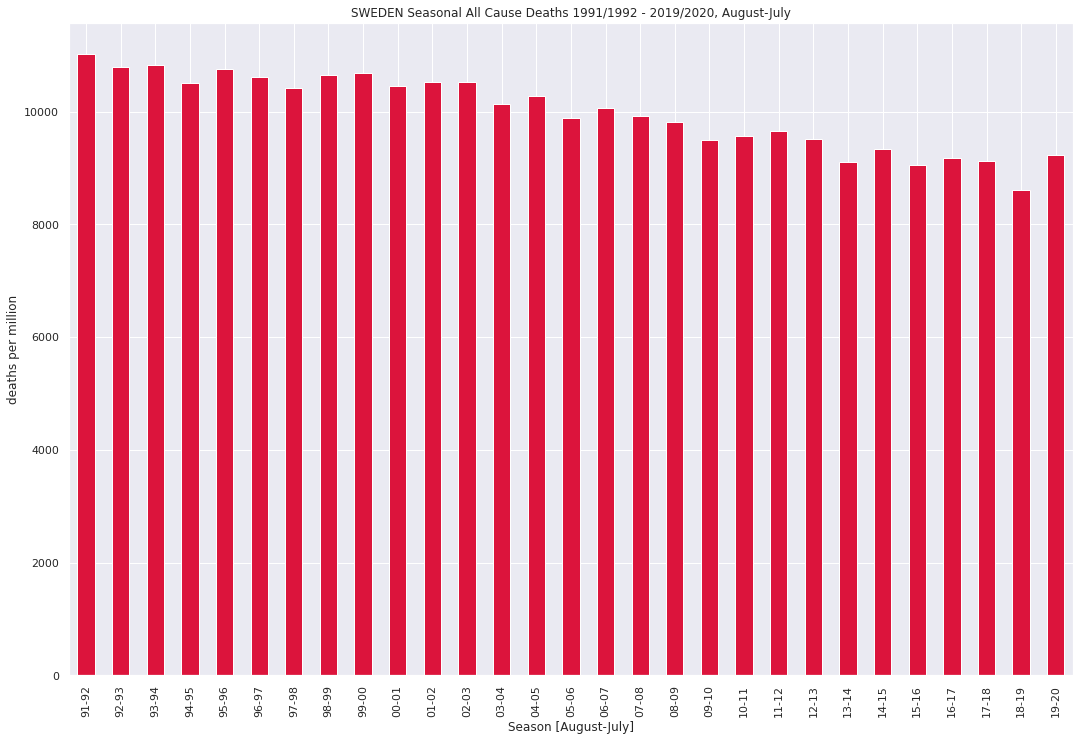

In [132]:
all_season_deaths_per_m.plot(figsize=(18,12),kind='bar',color='crimson',
                            title='SWEDEN Seasonal All Cause Deaths 1991/1992 - 2019/2020, August-July')

plt.xlabel('Season [August-July]')
plt.ylabel('deaths per million')

plt.savefig('sweden_seasonal_deaths_91_2020_aug_jul.jpg',format='jpg',dpi=400)
                             